## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import yfinance as yf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Stock Data

In [2]:
stock=yf.download('GRASIM.NS',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False).reset_index()
stock.columns = stock.columns.droplevel(1)  # Removes multi-index nature of columns
stock=stock.drop('Date',axis=1)
stock.columns.name = None   # Removes name of columns that describes what column represents
stock

,Close,High,Low,Open,Volume
0,750.938721,759.922997,739.672010,749.821757,2143086
1,754.872437,757.494834,742.537268,752.735641,1746130
2,769.004456,771.626854,749.384769,757.591986,2418947
3,768.907227,771.626757,758.563156,769.004359,1706604
4,762.642517,780.902406,759.631530,771.286829,2363692
...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682


## USD INR Exchange Rate

In [3]:
er=pd.DataFrame(pd.read_csv('USD_INR.csv')['Price']).iloc[:1238,:]
er=er.rename({'Price':'Exchange Rate'},axis=1)
er

,Exchange Rate
0,88.003
1,87.991
2,87.810
3,88.782
4,88.665
...,...
1233,72.915
1234,72.970
1235,72.985
1236,72.970


## Interest Rate (Repo Rate)

In [4]:
ir=pd.DataFrame(pd.read_csv('Interest Rate.csv')['Interest Rate (%)']).iloc[:1238,:]
ir

,Interest Rate (%)
0,5.5
1,5.5
2,5.5
3,5.5
4,5.5
...,...
1233,4.0
1234,4.0
1235,4.0
1236,4.0


## Crude Oil Prices

In [5]:
oil=pd.DataFrame(pd.read_csv('Oil Price.csv')[['Price','Vol.']]).iloc[:1238,:]
oil=oil.rename({'Price':'Oil Price','Vol.':'Oil Vol'},axis=1)
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: str(x).replace('K',''))
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: float(x)*1000)
oil

,Oil Price,Oil Vol
0,56.95,5520.0
1,57.54,108750.0
2,57.46,203870.0
3,58.27,224920.0
4,58.27,232450.0
...,...,...
1233,56.70,170650.0
1234,56.07,147930.0
1235,55.54,173150.0
1236,54.62,182830.0


## FPI Data

In [6]:
fpi=pd.read_csv("FPI Data.csv")
fpi

,FPI Data
0,2.453022e+07
1,1.312243e+09
2,6.617675e+07
3,1.031920e+11
4,1.131740e+11
...,...
1233,2.793077e+09
1234,2.793077e+09
1235,2.793077e+09
1236,2.793077e+09


## Parent Indices Data

**NIFTY 50**

In [7]:
nifty50=yf.download('^NSEI',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty50.columns = nifty50.columns.droplevel(1)  
nifty50=nifty50.drop('Date',axis=1)
nifty50.columns.name = None   
nifty50=nifty50.rename(columns={'Close':'NIFTY50 Close','Volume':'NIFTY50 Vol'})
nifty50

,NIFTY50 Close,NIFTY50 Vol
0,11873.049805,541400
1,11896.799805,453600
2,11937.650391,623700
3,11896.450195,544900
4,11930.349609,502300
...,...,...
1232,25227.349609,234300
1233,25145.500000,292100
1234,25323.550781,289900
1235,25585.300781,372800


**NIFTY Commodities**

In [8]:
nifty_commodities=yf.download('^CNXCMDT',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_commodities.columns = nifty_commodities.columns.droplevel(1)  
nifty_commodities=nifty_commodities.drop('Date',axis=1)
nifty_commodities.columns.name = None
nifty_commodities=nifty_commodities.rename(columns={'Close':'NIFTYCMDT Close','Volume':'NIFTYCMDT Vol'})
nifty_commodities

,NIFTYCMDT Close,NIFTYCMDT Vol
0,3186.300049,2402300
1,3170.350098,1930200
2,3204.949951,2849600
3,3225.500000,2414300
4,3222.750000,2256200
...,...,...
1217,9116.599609,0
1218,9050.650391,0
1219,9142.700195,0
1220,9211.349609,0


**NIFTY Infrastructure**

In [9]:
nifty_infrastructure=yf.download('^CNXINFRA',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_infrastructure.columns = nifty_infrastructure.columns.droplevel(1)  
nifty_infrastructure=nifty_infrastructure.drop('Date',axis=1)
nifty_infrastructure.columns.name = None  
nifty_infrastructure=nifty_infrastructure.rename(columns={'Close':'NIFTYINFRA Close','Volume':'NIFTYINFRA Vol'}) 
nifty_infrastructure

,NIFTYINFRA Close,NIFTYINFRA Vol
0,3090.750000,2397700
1,3093.149902,2342600
2,3122.050049,2964600
3,3145.100098,3196700
4,3152.399902,3180700
...,...,...
1217,9174.500000,1677000
1218,9134.500000,1744800
1219,9227.099609,1995000
1220,9305.349609,1795900


## Combining, Cleaning & Feature Engineering

In [10]:
final=pd.concat([stock,nifty50,nifty_infrastructure,nifty_commodities,er,ir,oil,fpi],axis=1)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,NIFTYCMDT Vol,Exchange Rate,Interest Rate (%),Oil Price,Oil Vol,FPI Data
0,750.938721,759.922997,739.672010,749.821757,2143086,11873.049805,541400.0,3090.750000,2397700.0,3186.300049,2402300.0,88.003,5.5,56.95,5520.0,2.453022e+07
1,754.872437,757.494834,742.537268,752.735641,1746130,11896.799805,453600.0,3093.149902,2342600.0,3170.350098,1930200.0,87.991,5.5,57.54,108750.0,1.312243e+09
2,769.004456,771.626854,749.384769,757.591986,2418947,11937.650391,623700.0,3122.050049,2964600.0,3204.949951,2849600.0,87.810,5.5,57.46,203870.0,6.617675e+07
3,768.907227,771.626757,758.563156,769.004359,1706604,11896.450195,544900.0,3145.100098,3196700.0,3225.500000,2414300.0,88.782,5.5,58.27,224920.0,1.031920e+11
4,762.642517,780.902406,759.631530,771.286829,2363692,11930.349609,502300.0,3152.399902,3180700.0,3222.750000,2256200.0,88.665,5.5,58.27,232450.0,1.131740e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,NaN,NaN,NaN,NaN,72.915,4.0,56.70,170650.0,2.793077e+09
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,NaN,NaN,NaN,NaN,72.970,4.0,56.07,147930.0,2.793077e+09
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,NaN,NaN,NaN,NaN,72.985,4.0,55.54,173150.0,2.793077e+09
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,NaN,NaN,NaN,NaN,72.970,4.0,54.62,182830.0,2.793077e+09


In [11]:
final['EMA_20'] = final['Close'].ewm(span=20, adjust=False).mean()
final['EMA_50'] = final['Close'].ewm(span=50, adjust=False).mean()
final['EMA_100'] = final['Close'].ewm(span=100, adjust=False).mean()
final['Gained']=(final['Close']-final['Close'].shift(1)).where(final['Close']>final['Close'].shift(1), 0)
final['Lost']=(abs(final['Close']-final['Close'].shift(1))).where(final['Close']<final['Close'].shift(1), 0)
final['RSI']=(100*final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())/(1+final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())
final['Log Returns']=np.log(final['Close']/final['Close'].shift(1))
final['Volatility']=final['Close'].rolling(20).std()
final['H/L']=final['High']/final['Low']
final['VR1']=final['Volume']/final['NIFTY50 Vol']
final['VR2']=final['Volume']/final['NIFTYINFRA Vol']
final['VR3']=final['Volume']/final['NIFTYCMDT Vol']
final['NIFTY50 Change']=final['NIFTY50 Close']-final['NIFTY50 Close'].shift(1)
final['NIFTYINFRA Change']=final['NIFTYINFRA Close']-final['NIFTYINFRA Close'].shift(1)
final['NIFTYCMDT Change']=final['NIFTYCMDT Close']-final['NIFTYCMDT Close'].shift(1)

In [12]:
final['Target']=final['Close'].shift(-1)
final.fillna(method='ffill',inplace=True)
final.reset_index(inplace=True)

In [13]:
final=final.drop(['index','Gained','Lost'],axis=1)
final.dropna(inplace=True)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,...,Log Returns,Volatility,H/L,VR1,VR2,VR3,NIFTY50 Change,NIFTYINFRA Change,NIFTYCMDT Change,Target
19,817.179504,823.638456,795.957192,803.241710,5942145,12719.950195,513900.0,3355.300049,2253300.0,3482.250000,...,0.017264,17.011357,1.034777,11.562843,2.637086,2.820728,29.150391,11.199951,34.800049,814.508484
20,814.508484,820.336134,811.109026,818.782074,326158,12874.200195,707700.0,3390.449951,3262400.0,3532.350098,...,-0.003274,19.394854,1.011376,0.460870,0.099975,0.090984,154.250000,35.149902,50.100098,818.684937
21,818.684937,828.980442,811.546117,822.570056,1893365,12938.250000,731300.0,3421.500000,3329000.0,3537.949951,...,0.005114,21.659023,1.021483,2.589040,0.568749,0.704823,64.049805,31.050049,5.599854,824.561096
22,824.561096,827.232060,814.168459,817.373652,1727008,12771.700195,768800.0,3390.050049,3686800.0,3509.350098,...,0.007152,24.312400,1.016045,2.246368,0.468430,0.560517,-166.549805,-31.449951,-28.599854,812.711670
23,812.711670,837.139116,808.098116,820.530417,1931331,12859.049805,664000.0,3405.300049,3826300.0,3533.750000,...,-0.014475,25.461197,1.035937,2.908631,0.504752,0.712169,87.349609,15.250000,24.399902,831.408630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,9338.549805,3282500.0,9194.299805,...,-0.004635,39.184202,1.012057,0.960705,0.096430,inf,-81.849609,33.200195,-17.049805,2775.800049
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,9338.549805,3282500.0,9194.299805,...,-0.007966,39.840926,1.018166,1.090662,0.096430,inf,178.050781,33.200195,-17.049805,2816.800049
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,9338.549805,3282500.0,9194.299805,...,0.014662,39.016079,1.018276,1.233670,0.096430,inf,261.750000,33.200195,-17.049805,2859.800049
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,9338.549805,3282500.0,9194.299805,...,0.015150,38.582485,1.020553,1.226444,0.096430,inf,124.548828,33.200195,-17.049805,2836.199951


## Multicollinearity Check

**Correlation Matrix**

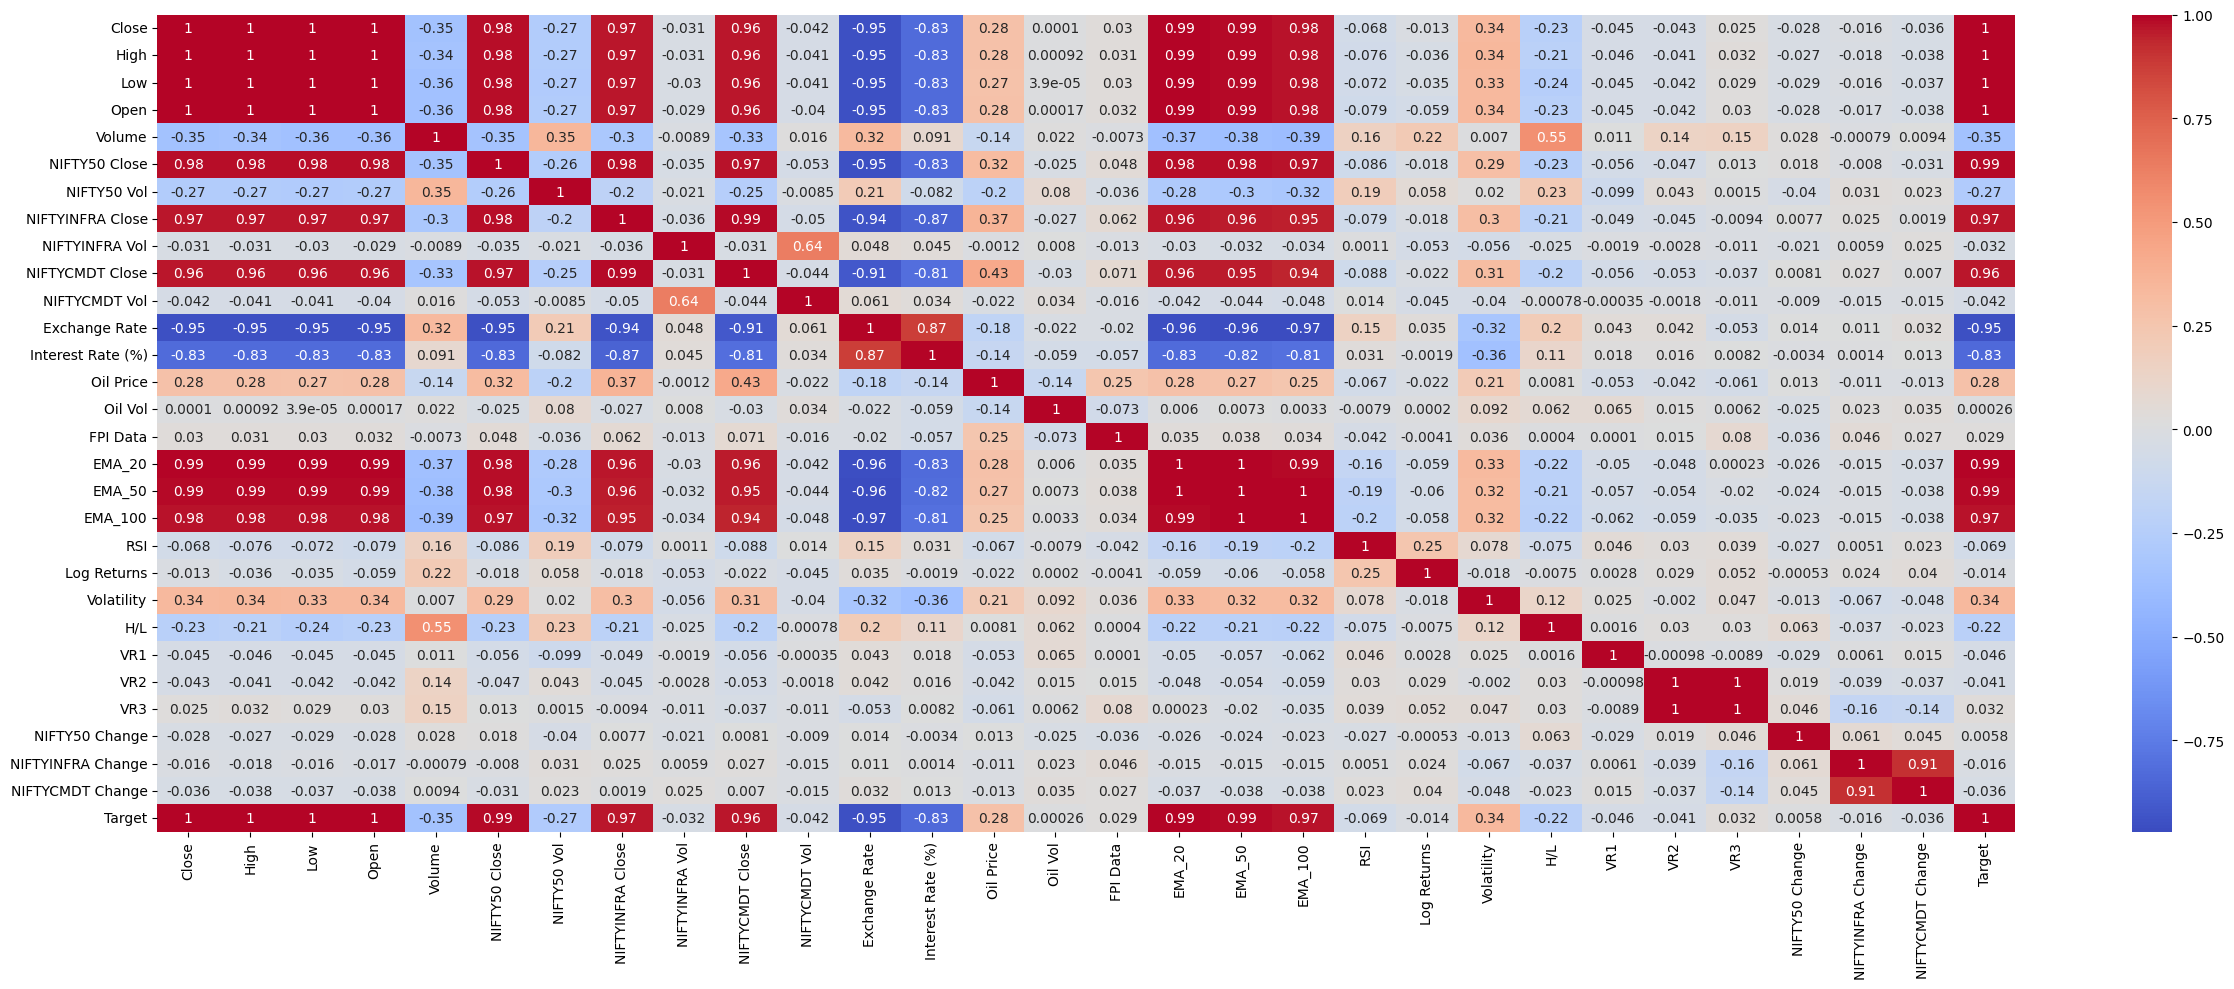

In [14]:
corr = final.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

**Variance Inflation Factor**

In [ ]:
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final.fillna(method='ffill',inplace=True)
final=final.iloc[101:,:] # Initial 100 NA values for EMA_100 

In [17]:
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns
vif_data["VIF"] = [variance_inflation_factor(final.values, i) for i in range(final.shape[1])]
vif_data

,feature,VIF
0,Close,3962.320004
1,High,3463.991048
2,Low,3000.407764
3,Open,2427.744490
4,Volume,7.500993
5,NIFTY50 Close,90.478368
6,NIFTY50 Vol,2.035826
7,NIFTYINFRA Close,165.479328
8,NIFTYINFRA Vol,1.715794
9,NIFTYCMDT Close,103.672646


## Importing Model's Libraries

In [18]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## Data Preprocessing

In [19]:
tscv = TimeSeriesSplit(n_splits=5)

In [20]:
X=final.drop('Target',axis=1)
y=final['Target']
split_index=int(0.8*len(X))
X_train=X[:split_index]
y_train=y[:split_index]
X_test=X[split_index:]
y_test=y[split_index:]

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Linear Regression

**Train & Test**

In [21]:
regression=LinearRegression()
regression.fit(X_train,y_train)
y_lr=regression.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_lr)},rmse:{mean_squared_error(y_test,y_lr)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_lr)*100/y_test.mean()} %')

mae:21.049474726504826,rmse:27.523111961733246
%mae:0.7980094632905146 %


**Plot Result**

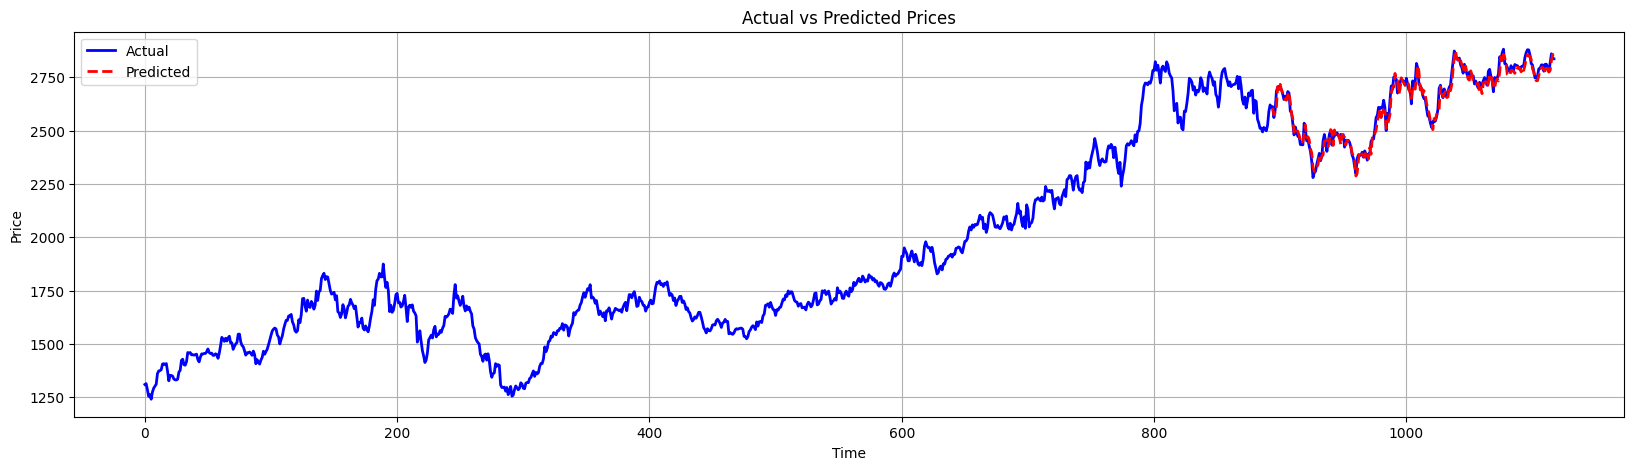

In [22]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 5))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_lr, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

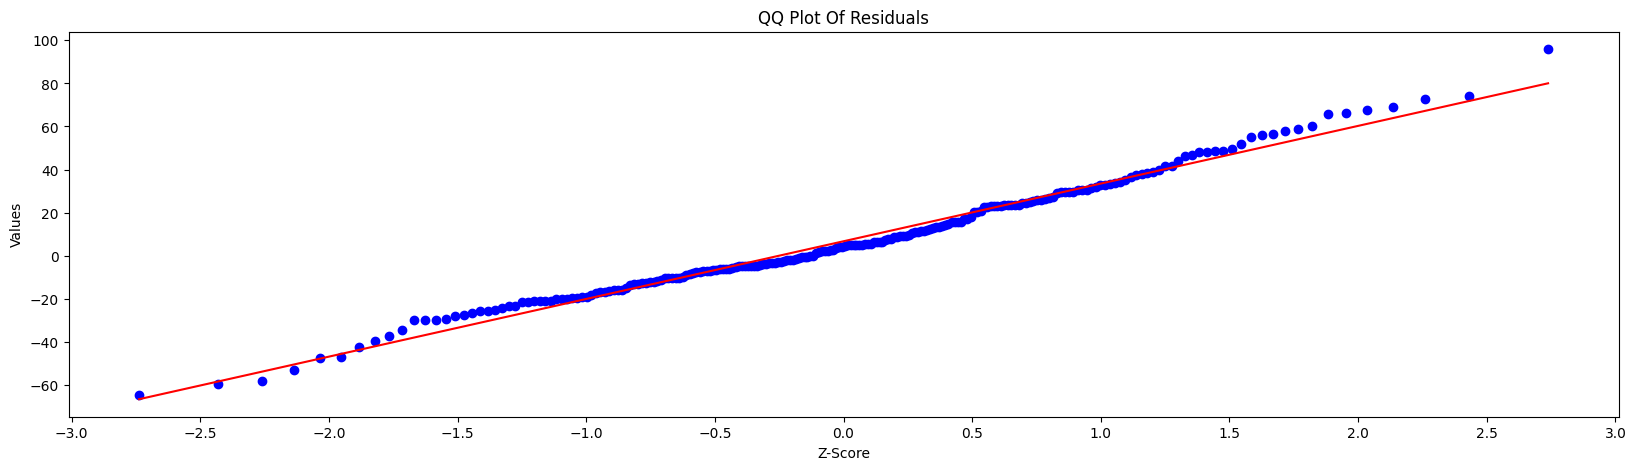

In [23]:
resid_lr=y_test-y_lr
plt.figure(figsize=(20,5))
st.probplot(resid_lr,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check**

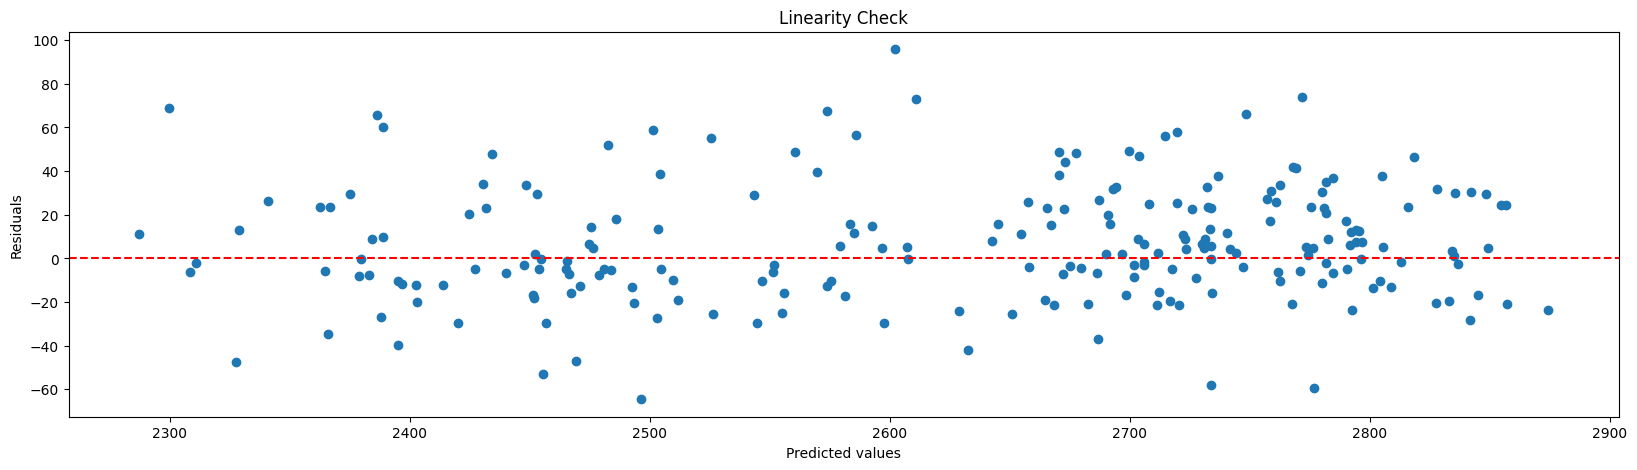

In [24]:
plt.figure(figsize=(20,5))
plt.scatter(y_lr, resid_lr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/ Ljung-Box Test)**

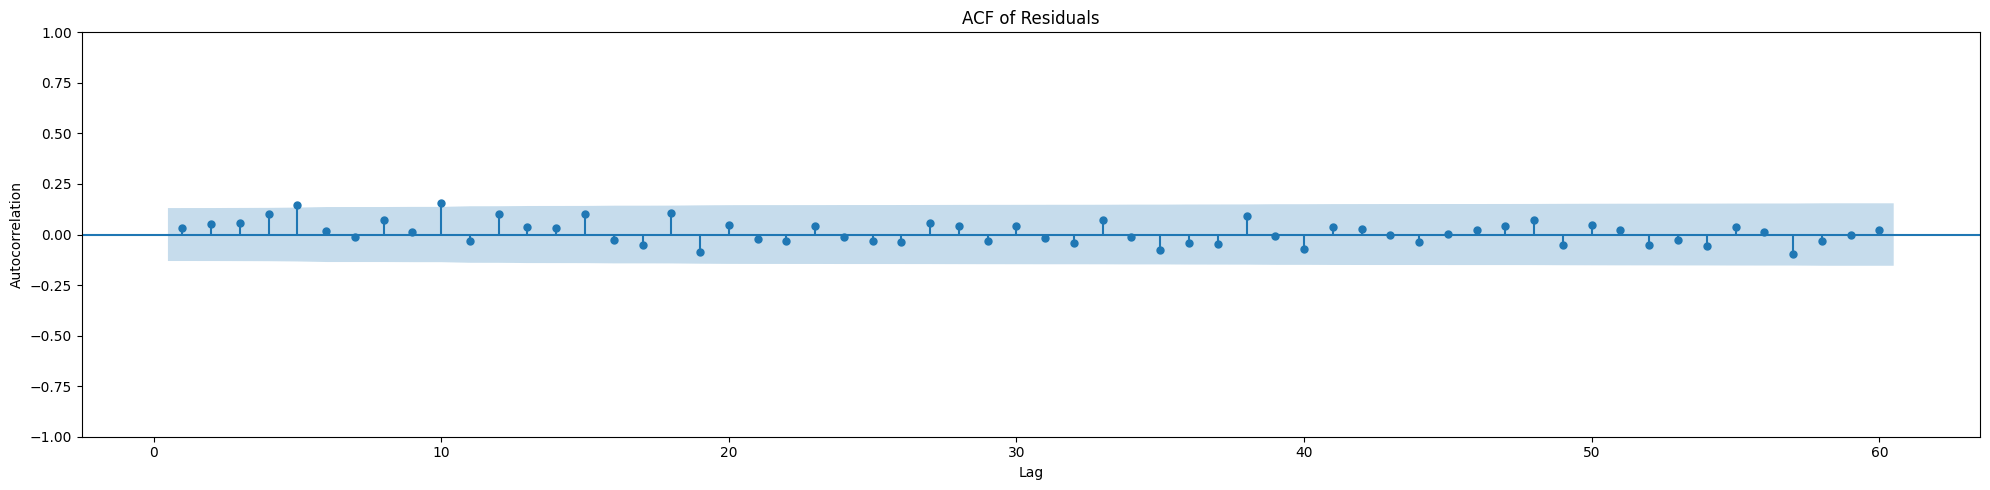

In [61]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_lr, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

In [62]:
lb_lr = acorr_ljungbox(resid_lr, lags=[10], return_df=True)
print(lb_lr)

      lb_stat  lb_pvalue
10  16.268011   0.092213


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [92]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_lr, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(26.305797202258134)}

## Support Vector Regression

**Train & Test**

In [25]:
svr_param={'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3],'gamma':['scale','auto'],'C':[1,10,50,100,500,1000]}
grid=GridSearchCV(estimator=SVR(),param_grid=svr_param,cv=tscv,refit=True,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_svr=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_svr)},rmse:{mean_squared_error(y_test,y_svr)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_svr)*100/y_test.mean()} %')

mae:20.89162719560036,rmse:26.57997047311123
%mae:0.7920252843475503 %


**Plot Result**

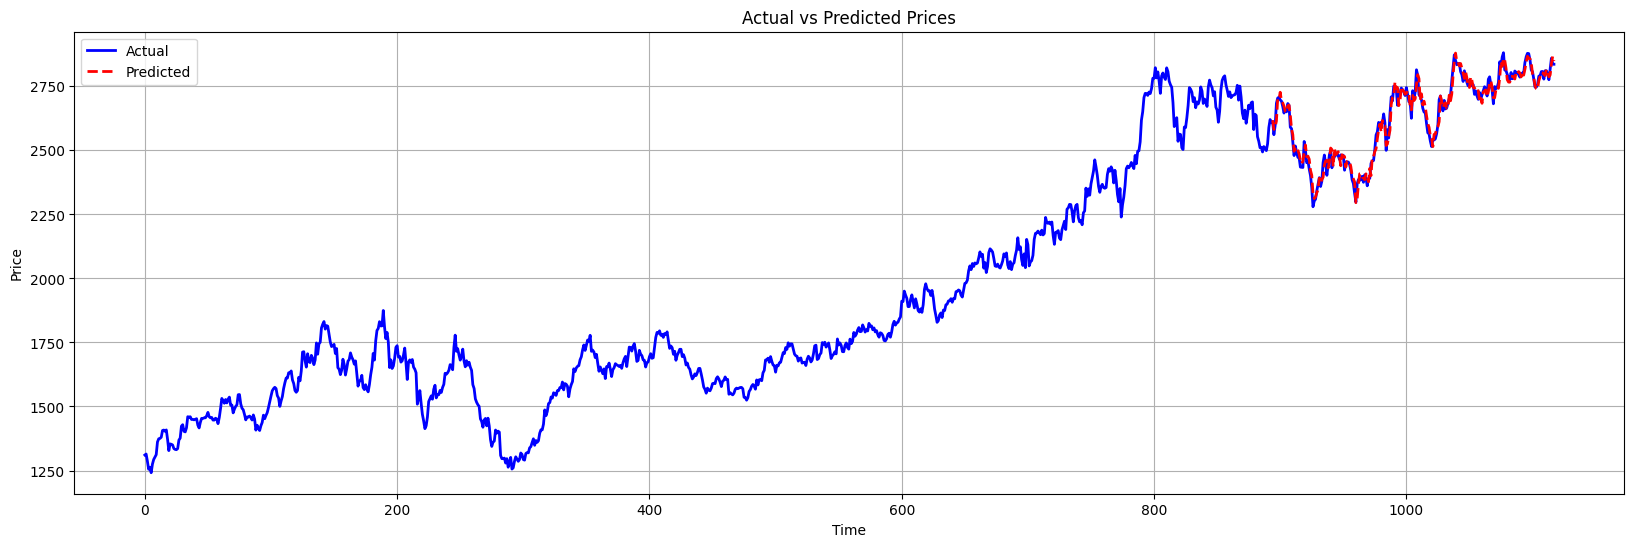

In [26]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_svr, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

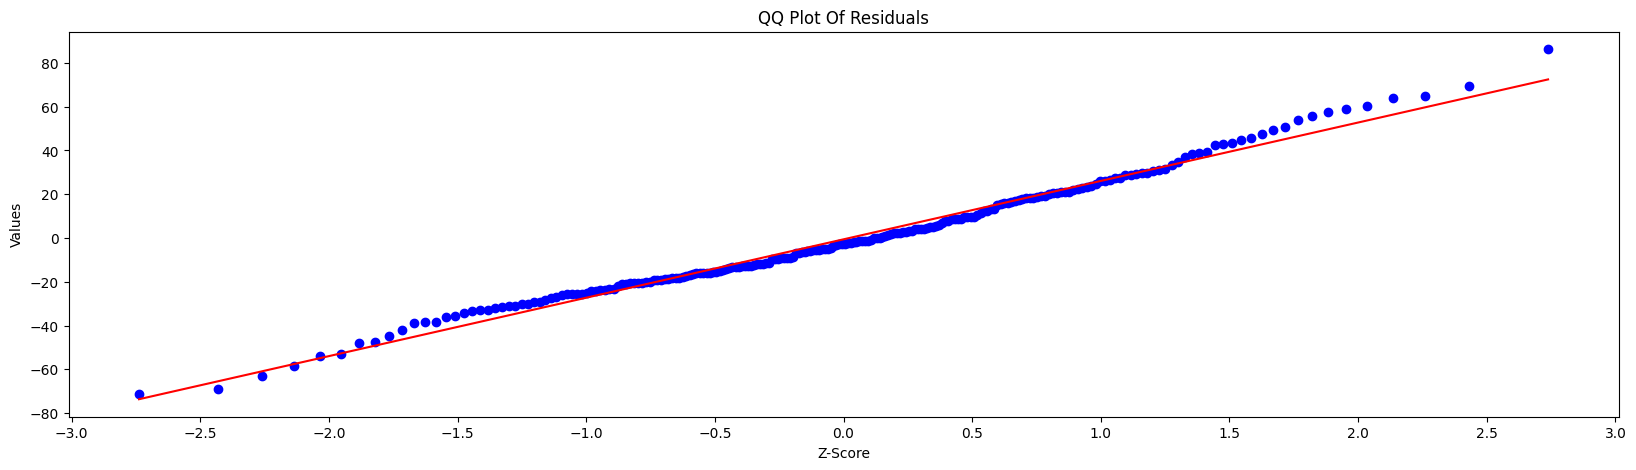

In [27]:
resid_svr=y_test-y_svr
plt.figure(figsize=(20,5))
st.probplot(resid_svr,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check**

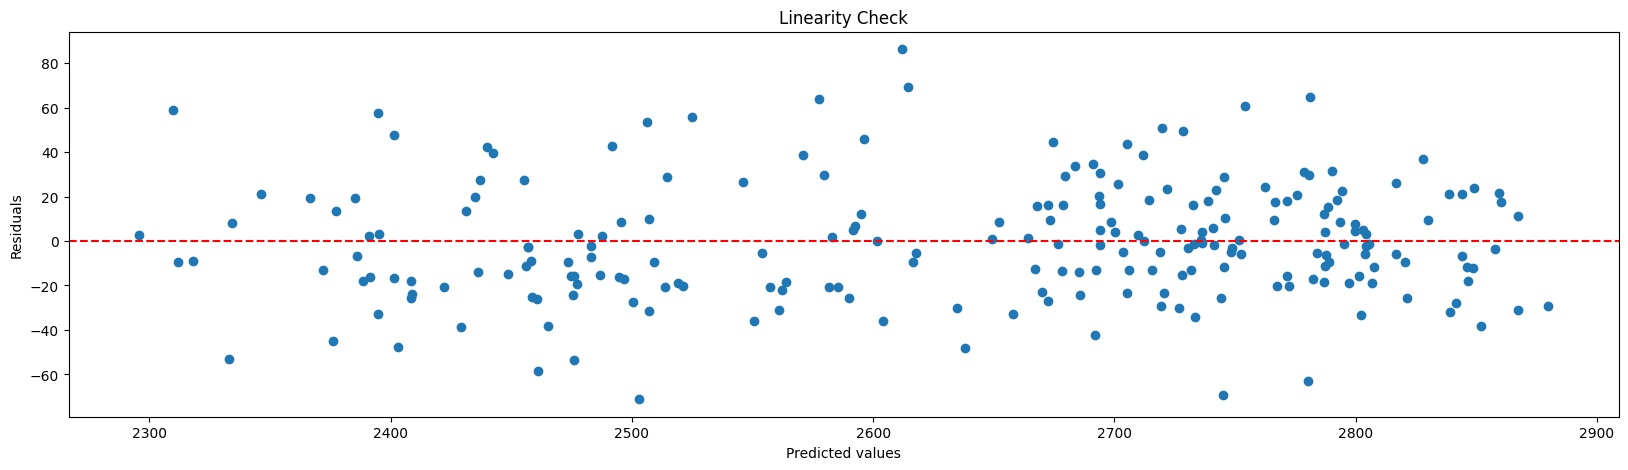

In [28]:
plt.figure(figsize=(20,5))
plt.scatter(y_svr, resid_svr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/ Ljung-Box Test)**

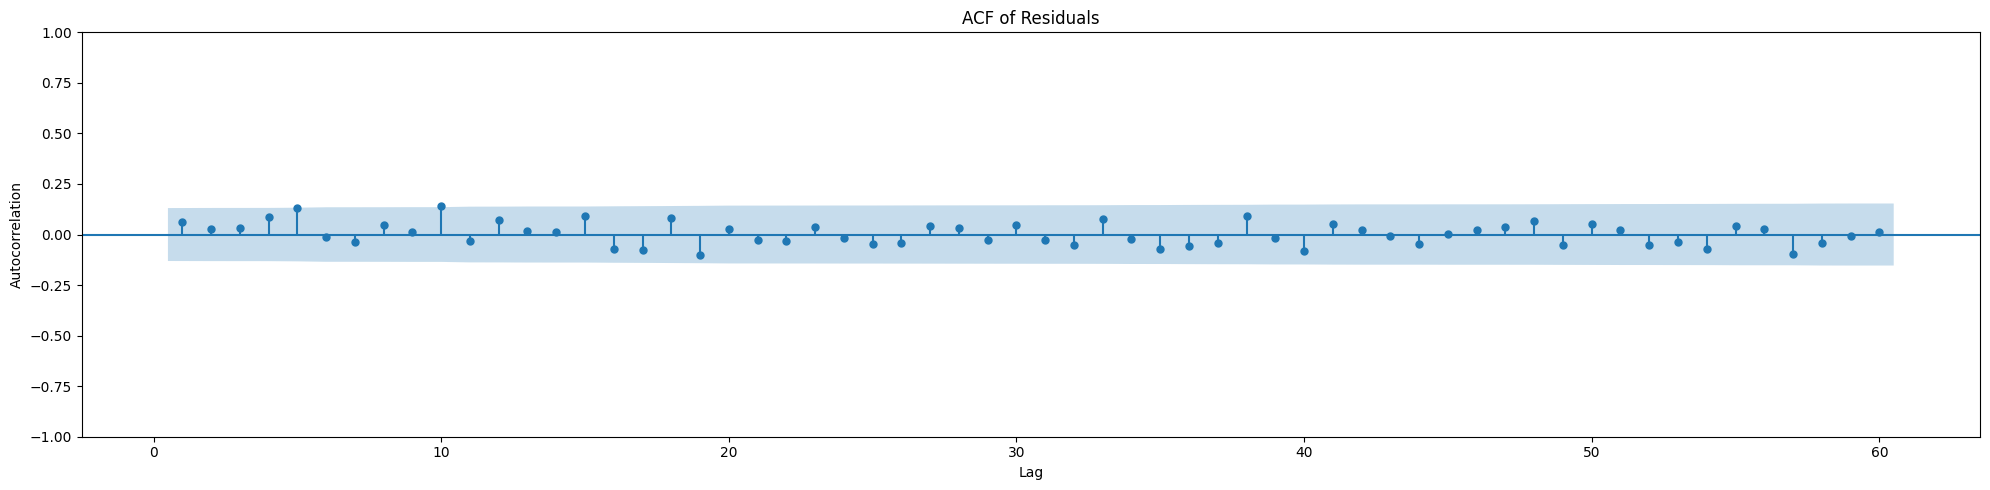

In [63]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_svr, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

In [69]:
lb_svr = acorr_ljungbox(resid_svr, lags=[10], return_df=True)
print(lb_svr)

      lb_stat  lb_pvalue
10  12.580365   0.248089


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [93]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_svr, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(25.21464323552955)}

## Random Forest Regressor

**Train & Test**

In [29]:
rf_param={'n_estimators':[100,200,300,500],'criterion':['squared_error','absolute_error'],'max_depth': [5, 8, 15, 10, None],'max_features': [5, 7, 10],'min_samples_split': [2, 8, 15, 20]}
grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=rf_param,refit=True,scoring='neg_mean_squared_error',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_rf=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_rf)},rmse:{mean_squared_error(y_test,y_rf)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_rf)*100/y_test.mean()} %')

mae:48.86758930751255,rmse:59.03468961851989
%mae:1.8526257411300555 %


**Plot Result**

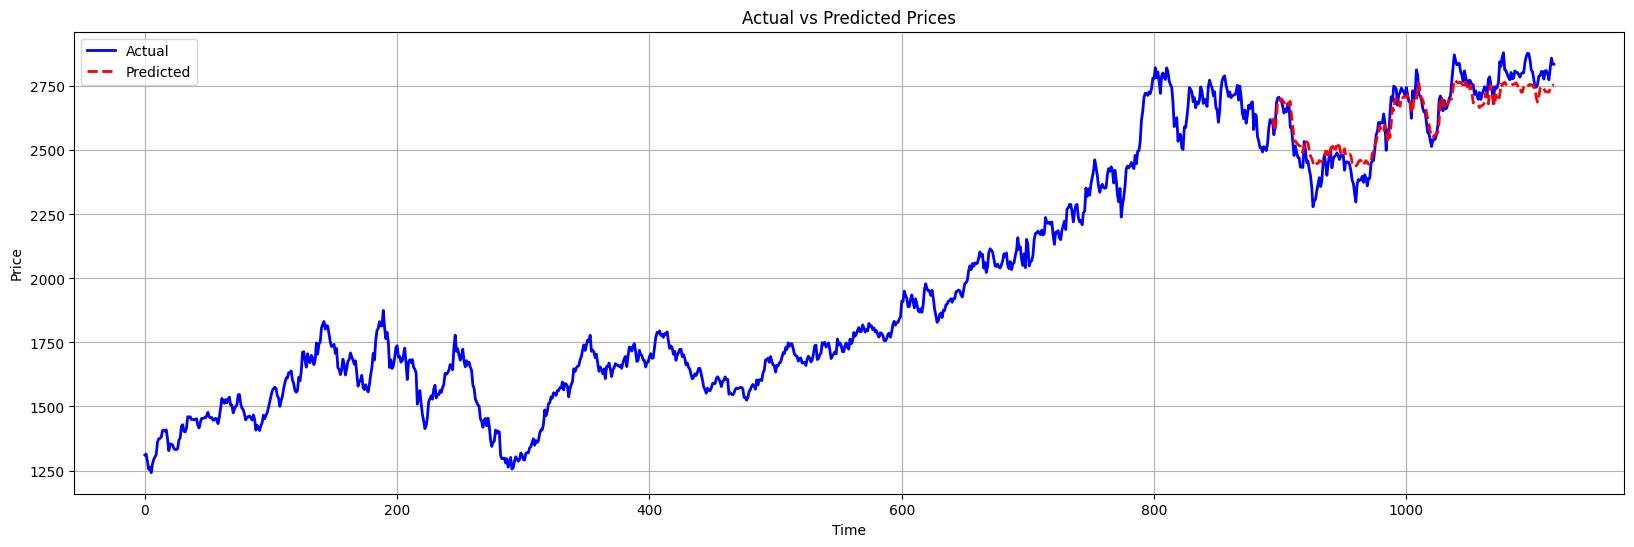

In [30]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_rf, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

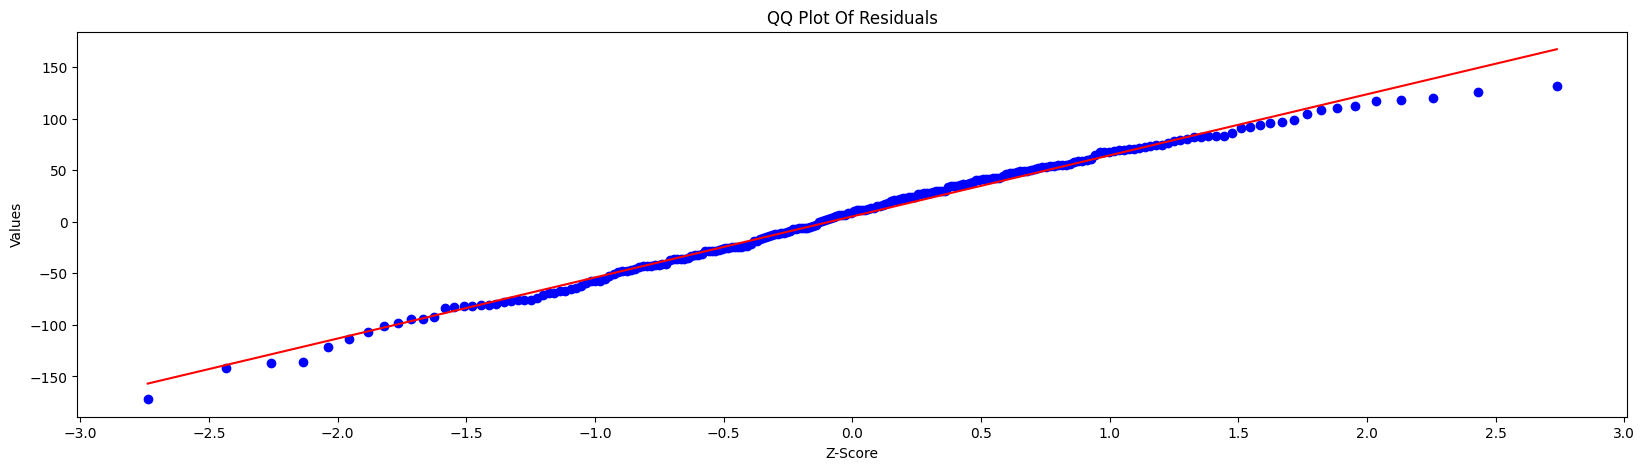

In [31]:
resid_rf=y_test-y_rf
plt.figure(figsize=(20,5))
st.probplot(resid_rf,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check** 

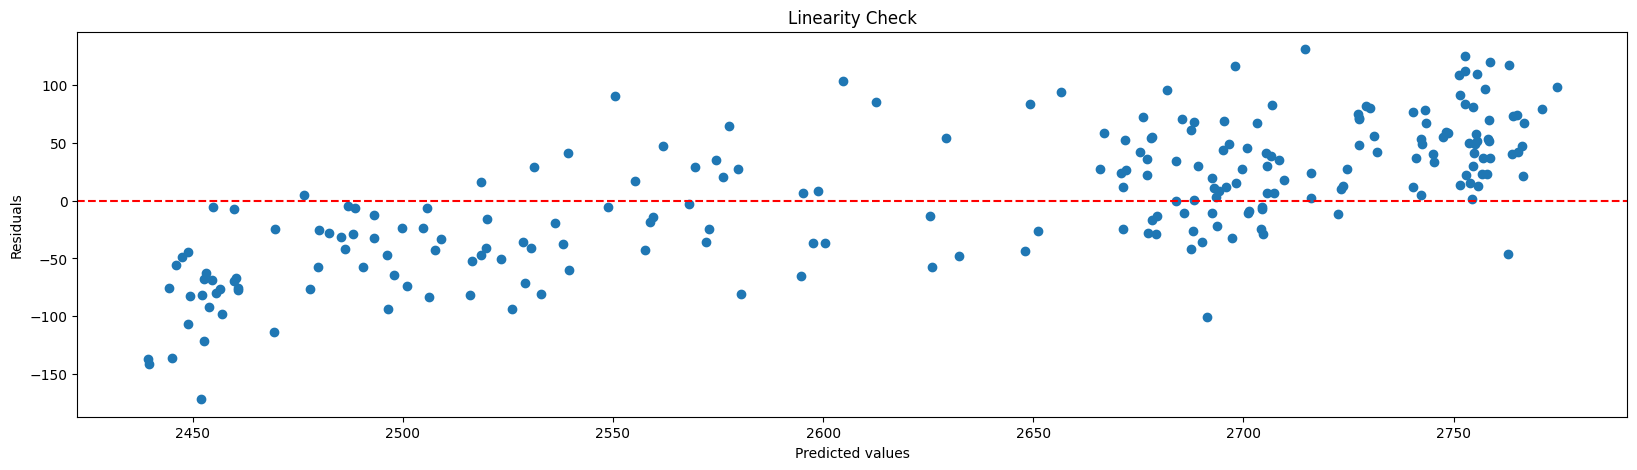

In [32]:
plt.figure(figsize=(20,5))
plt.scatter(y_rf, resid_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/PACF/ Ljung-Box Test)**

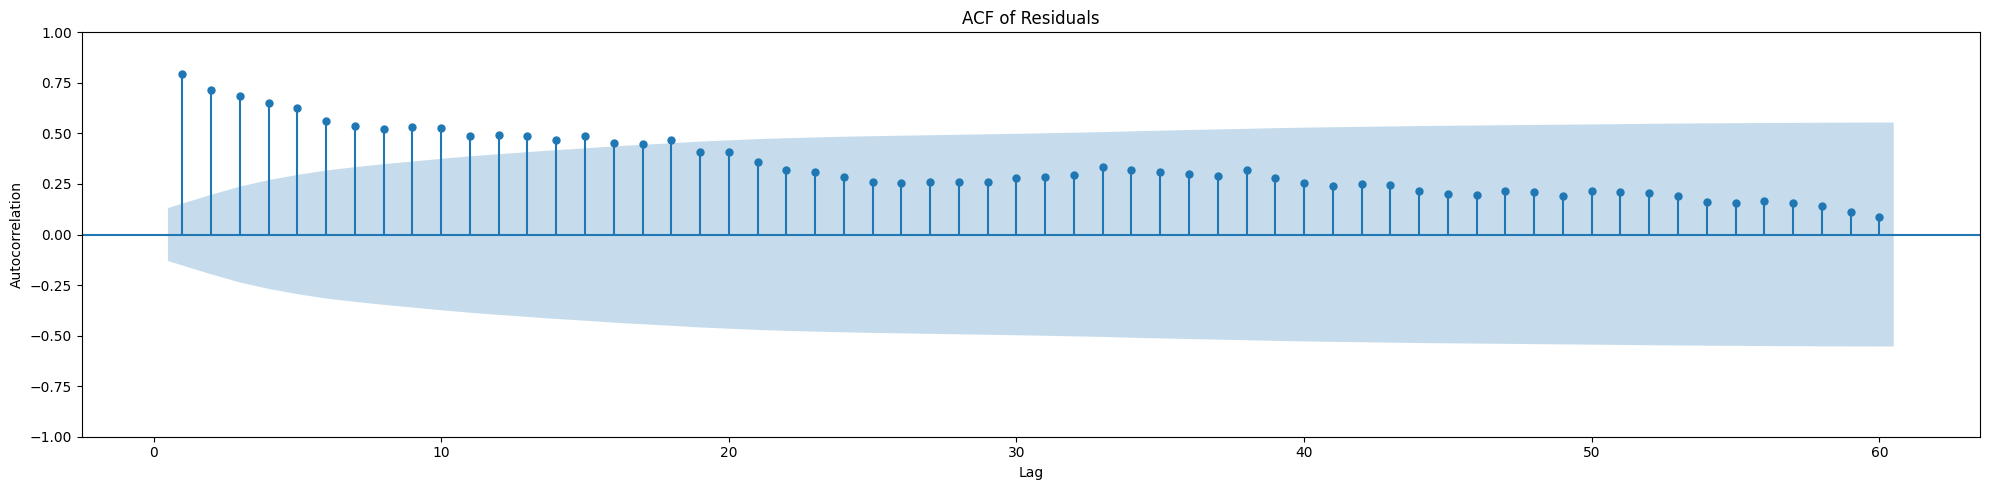

In [64]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_rf, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

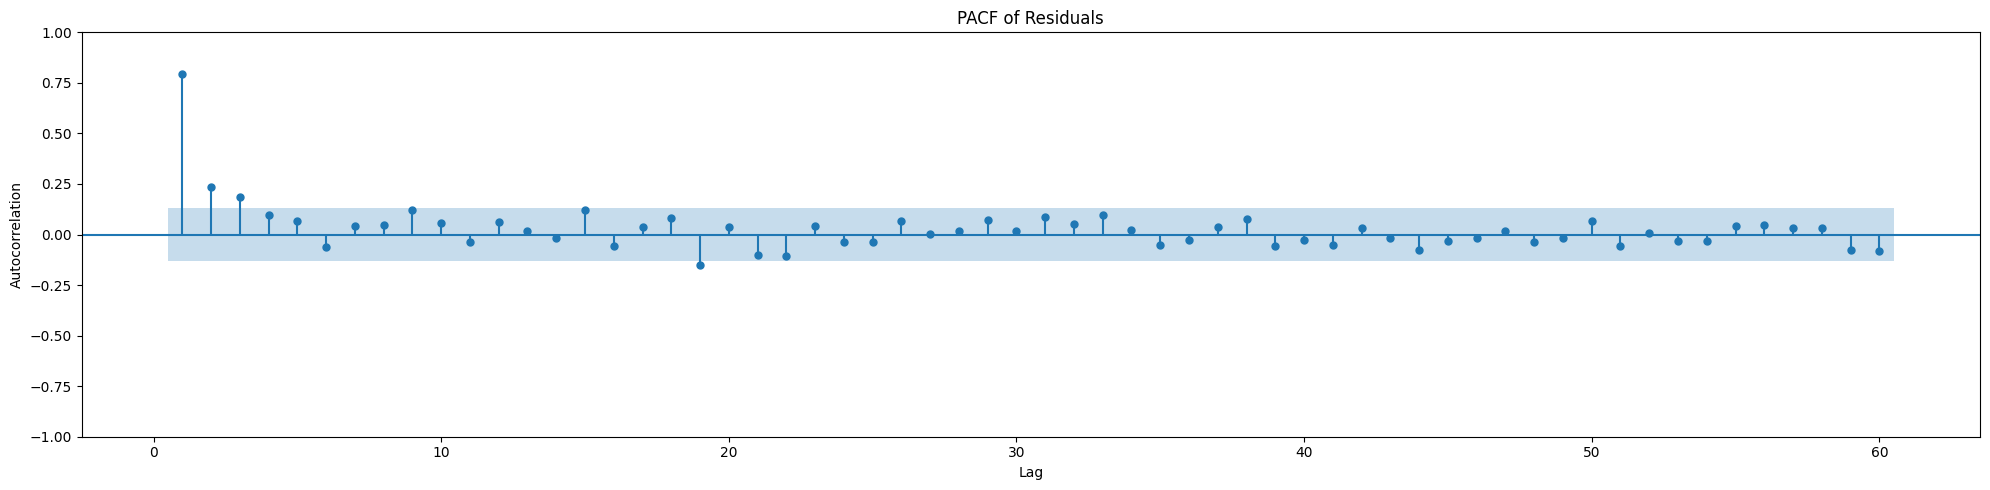

In [77]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_pacf(resid_rf, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

In [70]:
lb_rf = acorr_ljungbox(resid_rf, lags=[10], return_df=True)
print(lb_rf)

       lb_stat      lb_pvalue
10  891.921037  3.488880e-185


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [95]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_rf, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(46.00481114408284)}

## Adaboost Regressor

**Train & Test**

In [33]:
adb_param={'n_estimators':[100,300,500],'learning_rate':[0.01,0.05,0.1],'loss':['linear','square','exponential']}
grid=GridSearchCV(estimator=AdaBoostRegressor(),param_grid=adb_param,refit=True,scoring='neg_mean_squared_error',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_adb=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_adb)},rmse:{mean_squared_error(y_test,y_adb)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_adb)*100/y_test.mean()} %')

mae:60.56789237527797,rmse:73.35458334074484
%mae:2.296197502076995 %


**Plot Result**

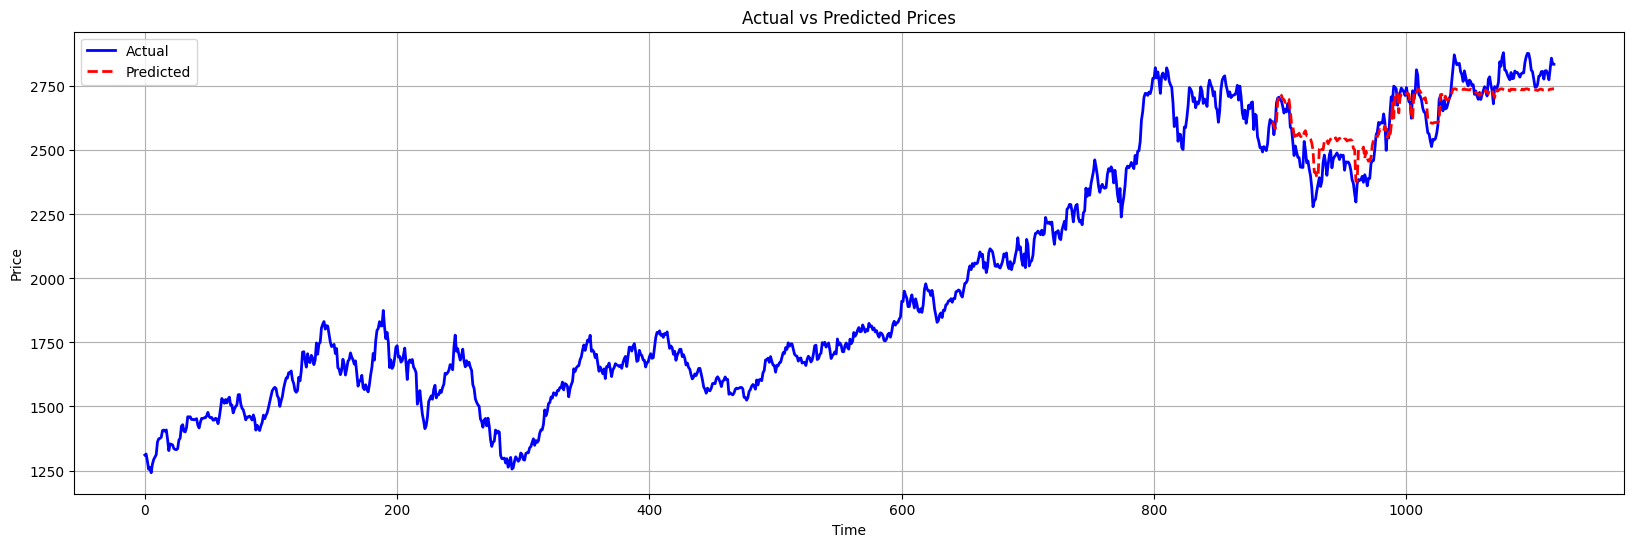

In [34]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_adb, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

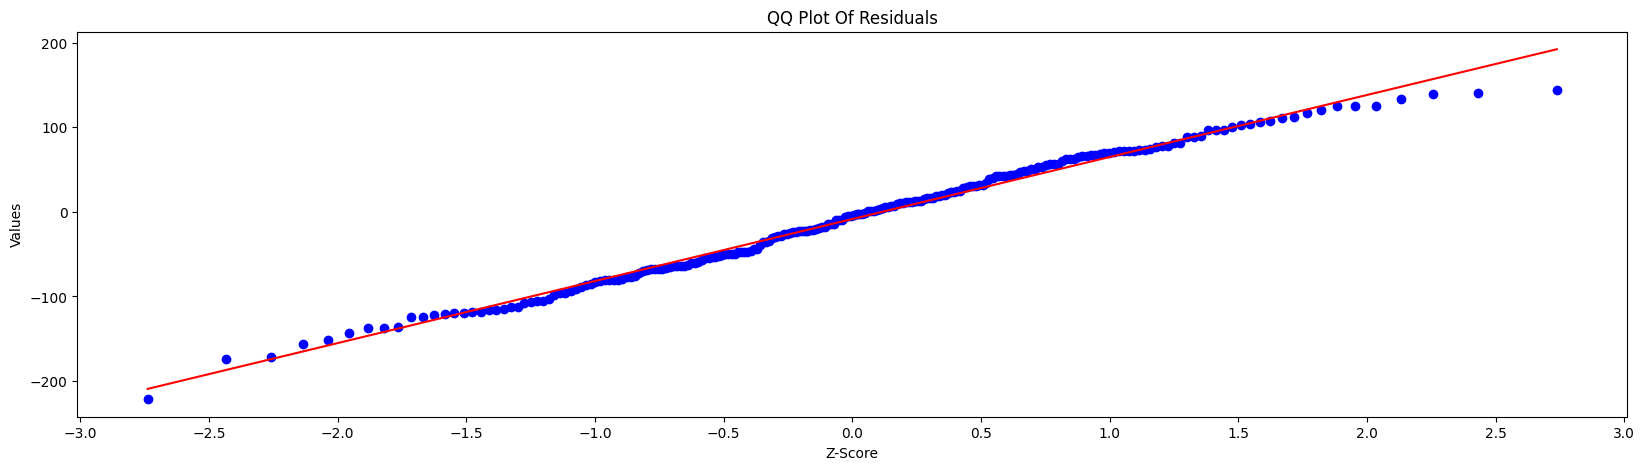

In [35]:
resid_adb=y_test-y_adb
plt.figure(figsize=(20,5))
st.probplot(resid_adb,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check** 

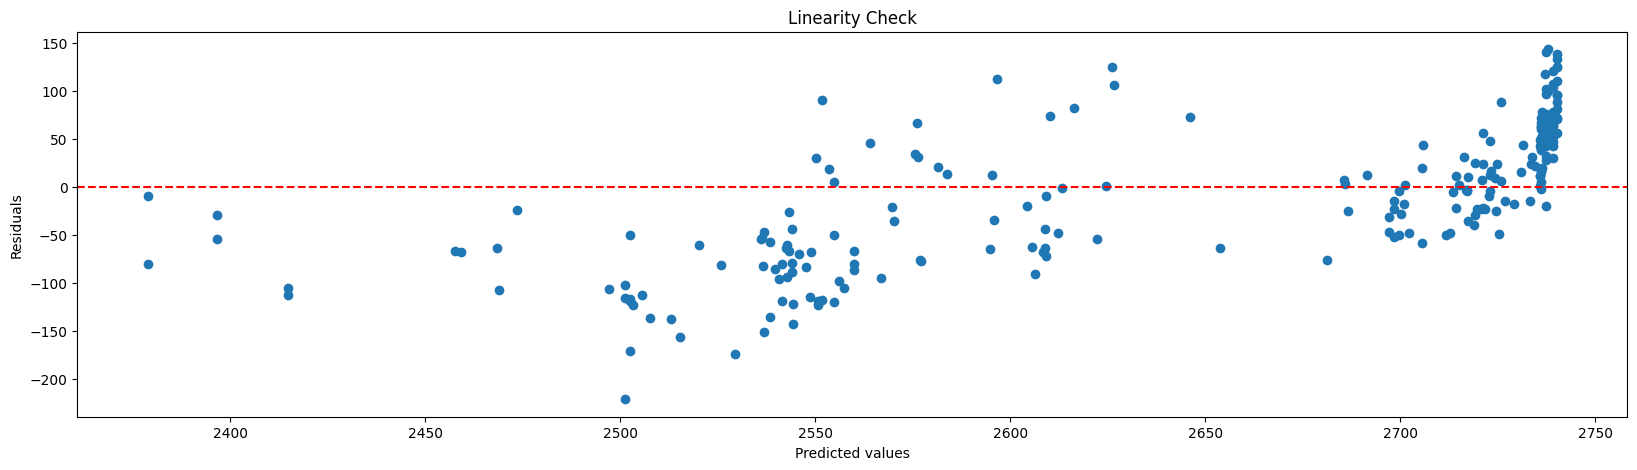

In [36]:
plt.figure(figsize=(20,5))
plt.scatter(y_adb, resid_adb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/PACF/ Ljung-Box Test)**

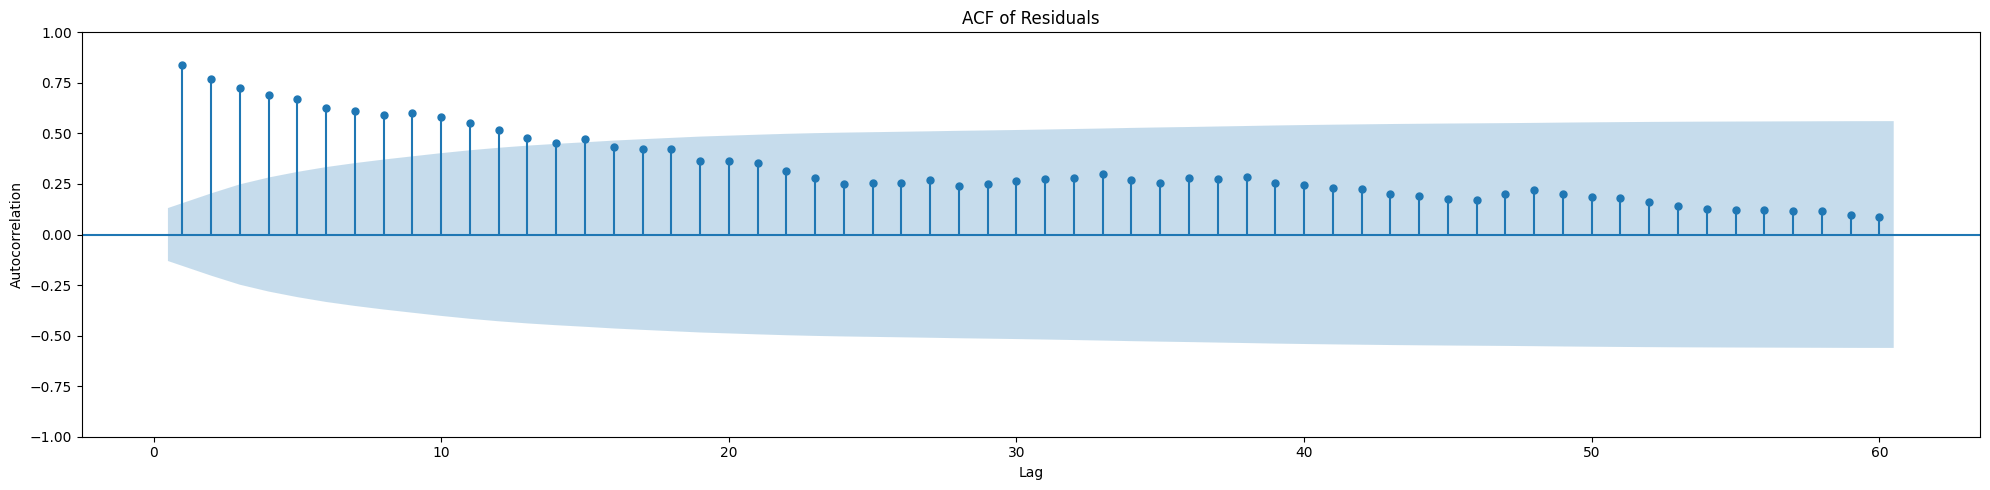

In [65]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_adb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

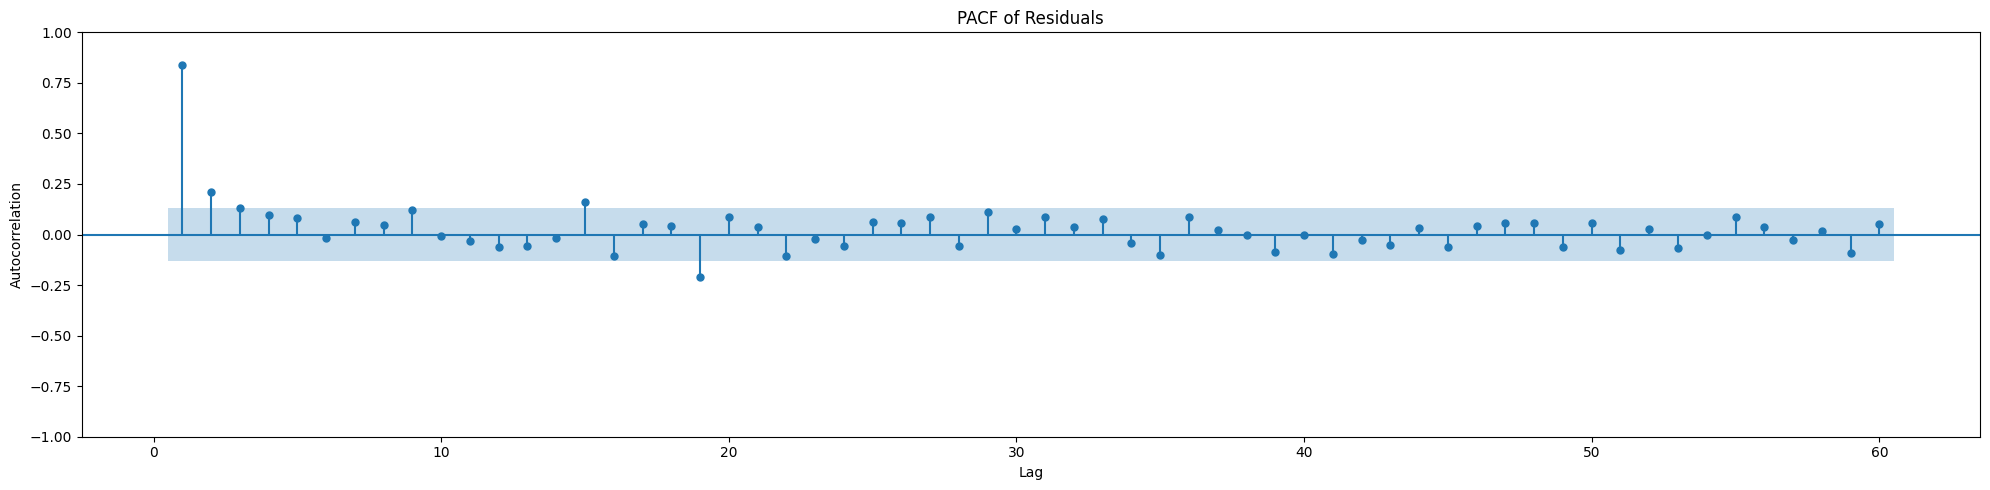

In [78]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_pacf(resid_adb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

In [71]:
lb_adb = acorr_ljungbox(resid_adb, lags=[10], return_df=True)
print(lb_adb)

       lb_stat      lb_pvalue
10  1054.11642  4.093107e-220


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [96]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_adb, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(64.1959313522912)}

## Gradient Boost Regressor

**Train & Test**

In [37]:
gb_param={'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.01,0.05,0.1],'n_estimators':[100,300,500],'criterion':['squared_error'],'min_samples_split': [2, 8, 15, 20]}
grid=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=gb_param,refit=True,scoring='neg_mean_squared_error',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_gb=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_gb)},rmse:{mean_squared_error(y_test,y_gb)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_gb)*100/y_test.mean()} %')

mae:50.12327002646749,rmse:59.61025465075154
%mae:1.9002300215036525 %


**Plot Result**

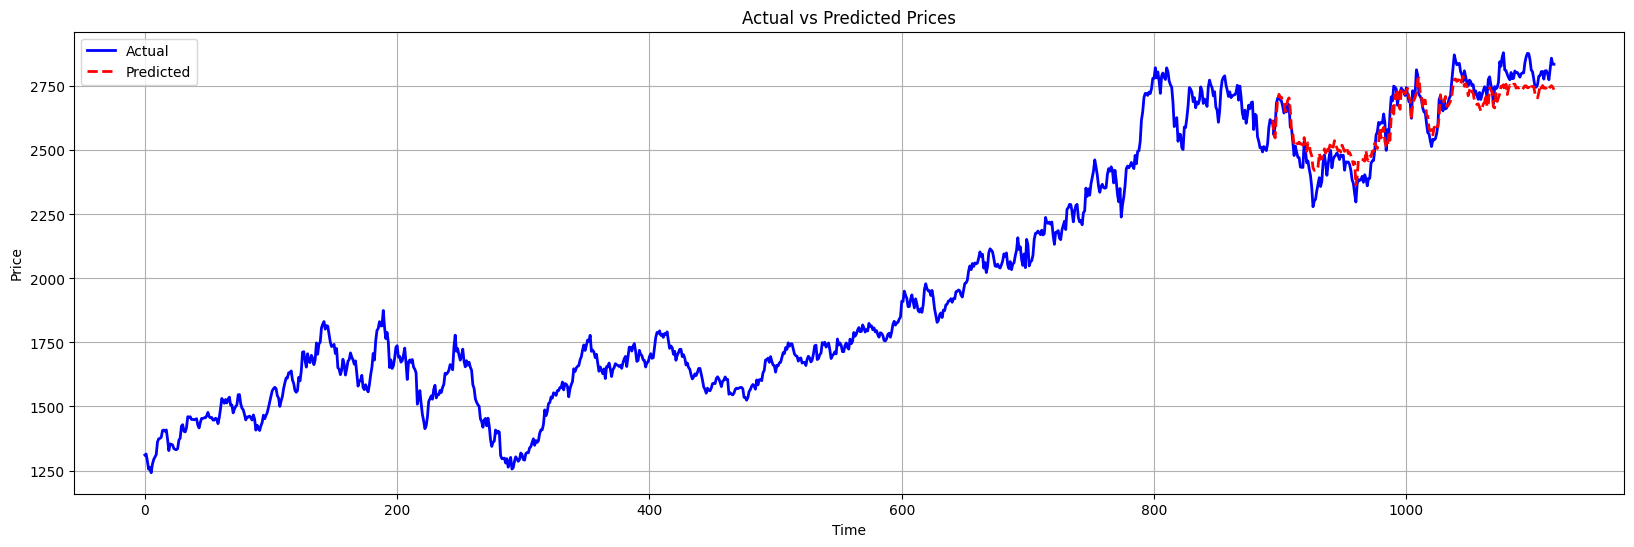

In [38]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_gb, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

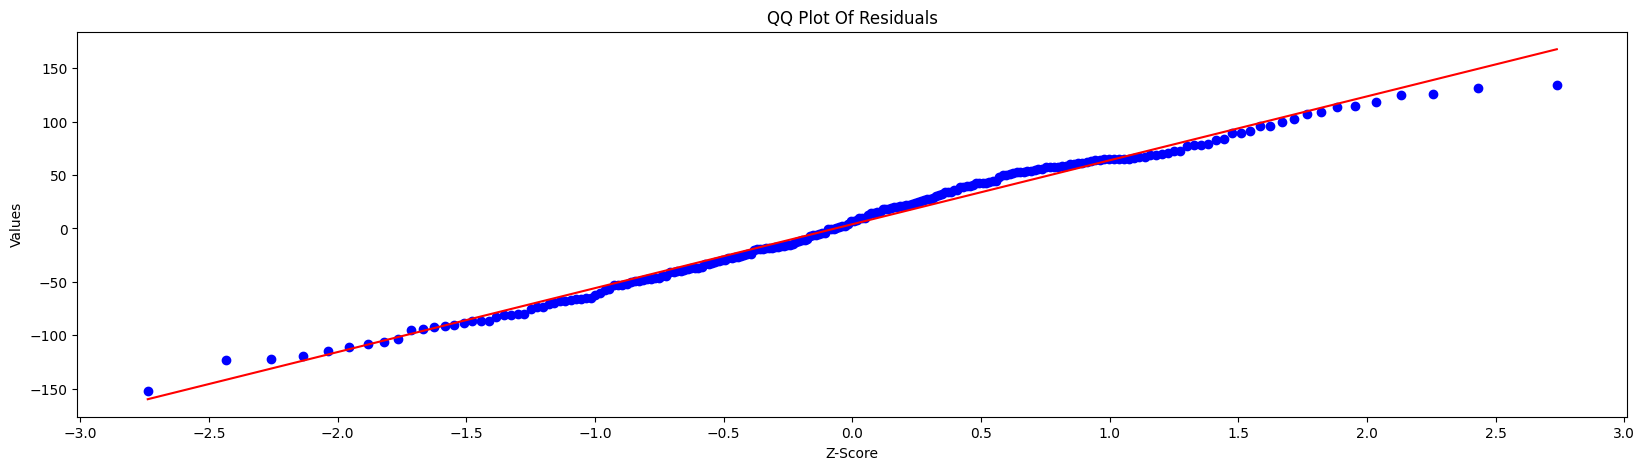

In [39]:
resid_gb=y_test-y_gb
plt.figure(figsize=(20,5))
st.probplot(resid_gb,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check**

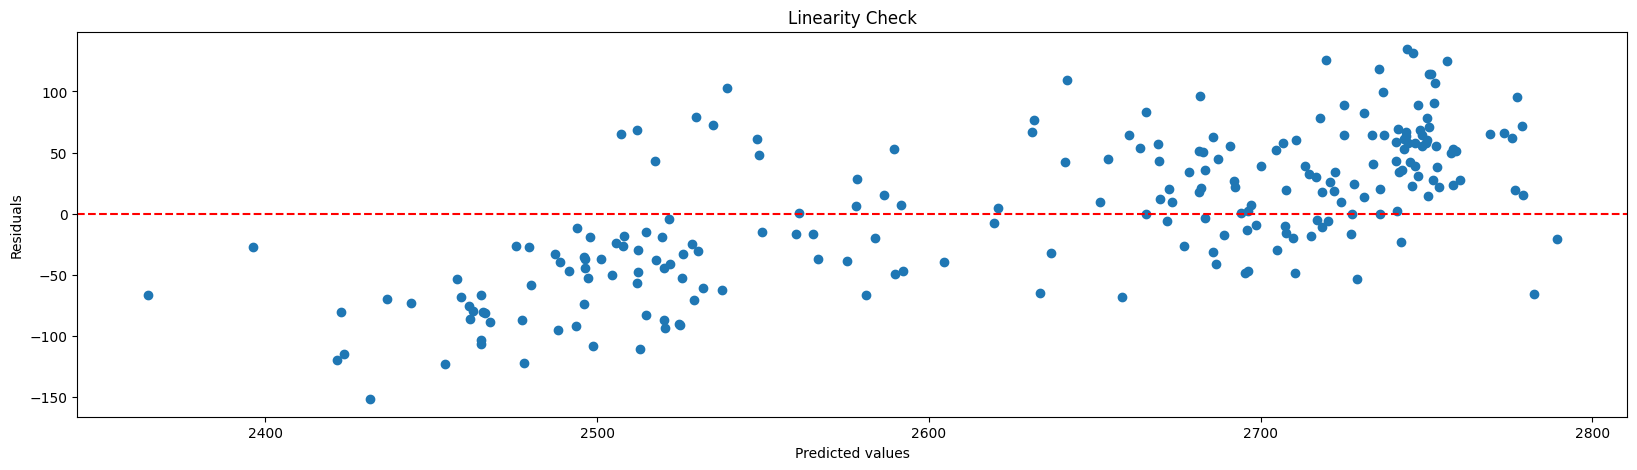

In [40]:
plt.figure(figsize=(20,5))
plt.scatter(y_gb, resid_gb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/PACF/ Ljung-Box Test)** 

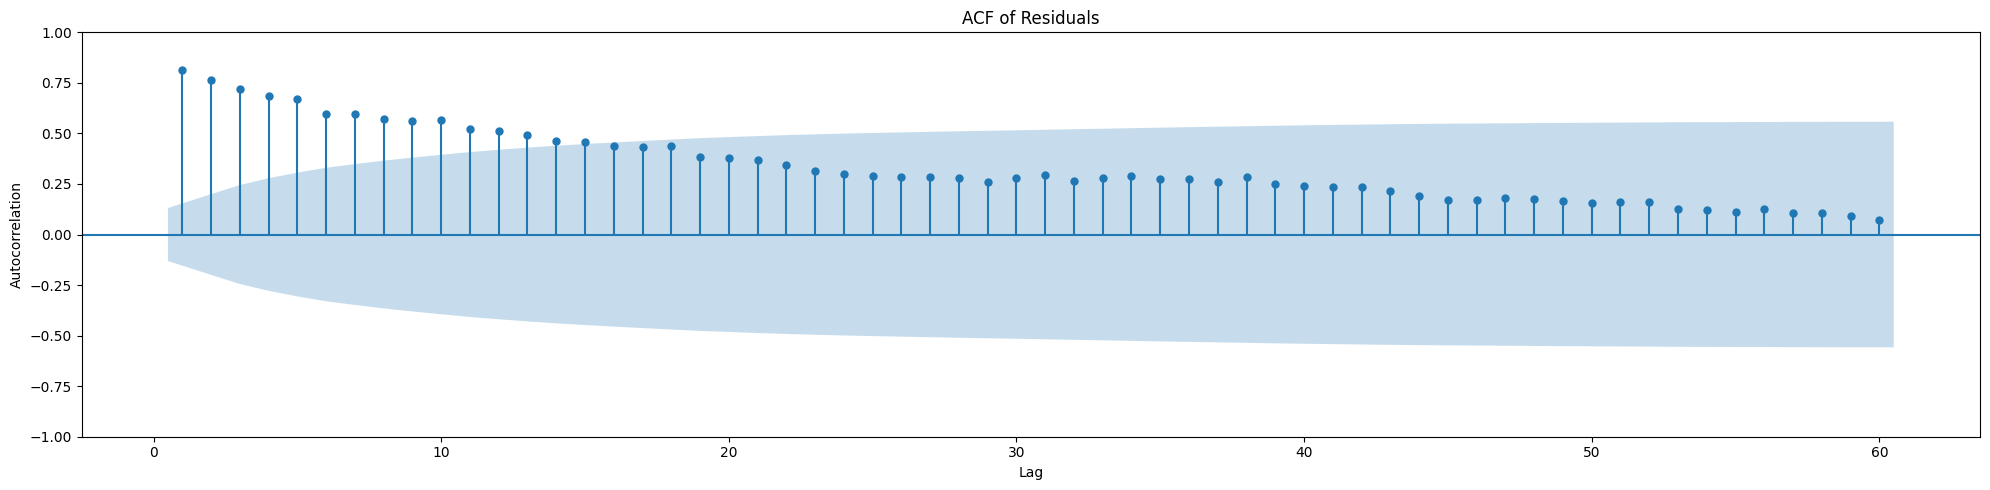

In [66]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_gb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

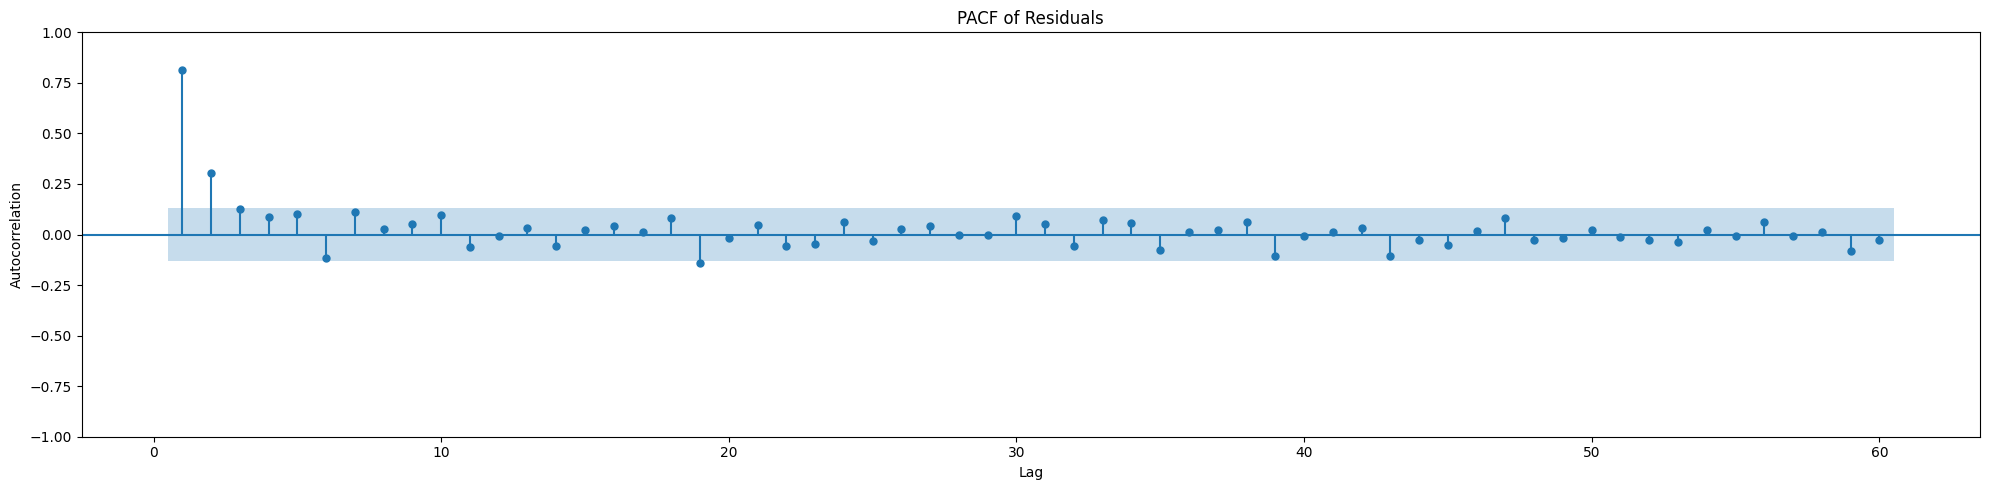

In [79]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_pacf(resid_gb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

In [72]:
lb_gb = acorr_ljungbox(resid_gb, lags=[10], return_df=True)
print(lb_gb)

        lb_stat      lb_pvalue
10  1005.221482  1.403162e-209


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [97]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_gb, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(48.248581519534966)}

## XGBoost Regressor

**Train & Test** 

In [41]:
xgb_param={'eta':[0.01,0.05,0.1],'gamma':[1,5,10,50,100],'max_depth':[3,5,10,15,None],'subsample':[0.05,0.1,0.5,1]}
grid=GridSearchCV(estimator=XGBRegressor(),param_grid=xgb_param,refit=True,scoring='neg_mean_squared_error',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_xgb=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_xgb)},rmse:{mean_squared_error(y_test,y_xgb)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_xgb)*100/y_test.mean()} %')

mae:36.39691053118025,rmse:45.74373281924545
%mae:1.3798481632345623 %


**Plot Result**

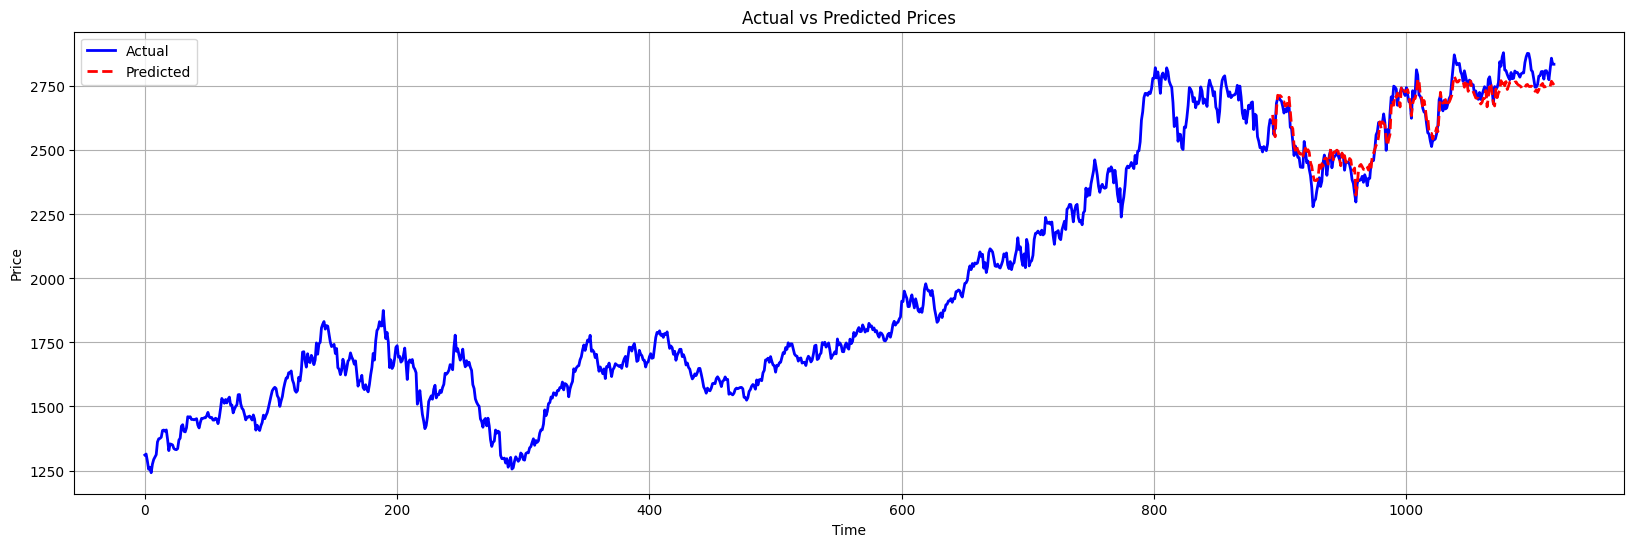

In [42]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_xgb, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check**

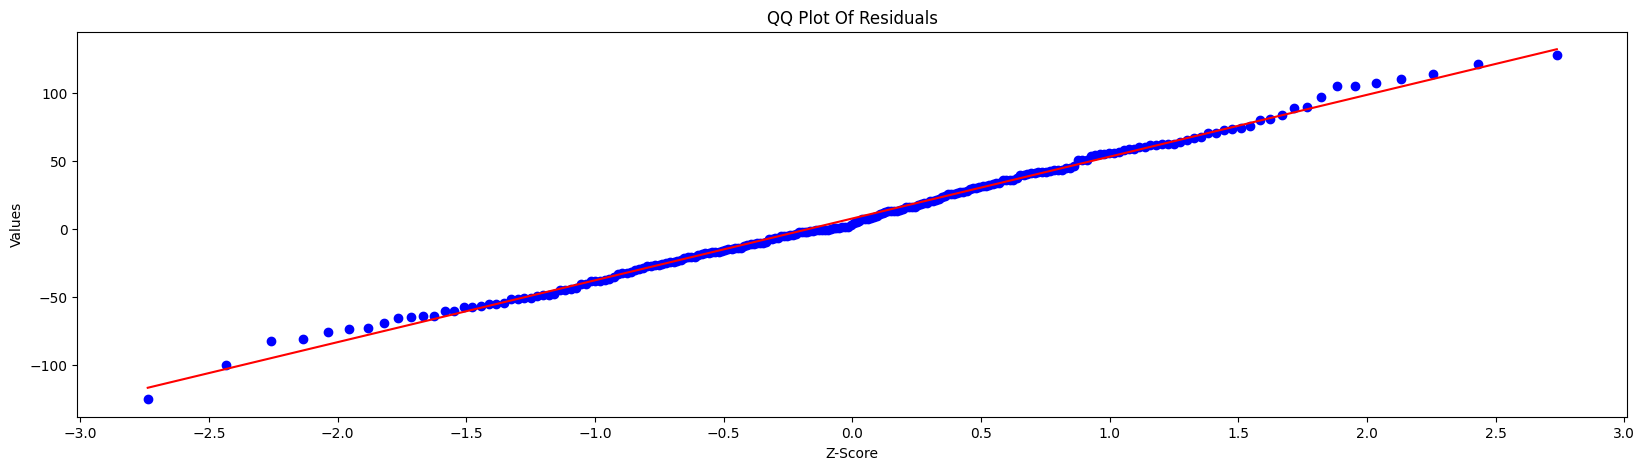

In [43]:
resid_xgb=y_test-y_xgb
plt.figure(figsize=(20,5))
st.probplot(resid_xgb,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check**

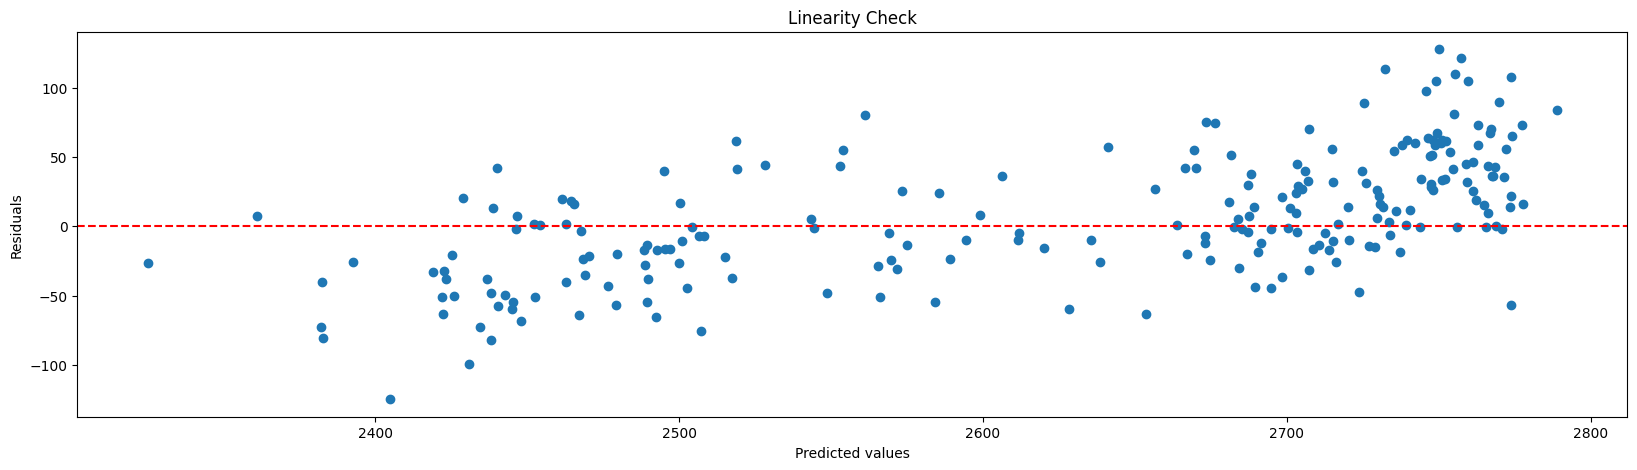

In [44]:
plt.figure(figsize=(20,5))
plt.scatter(y_xgb, resid_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/PACF/ Ljung-Box Test)**

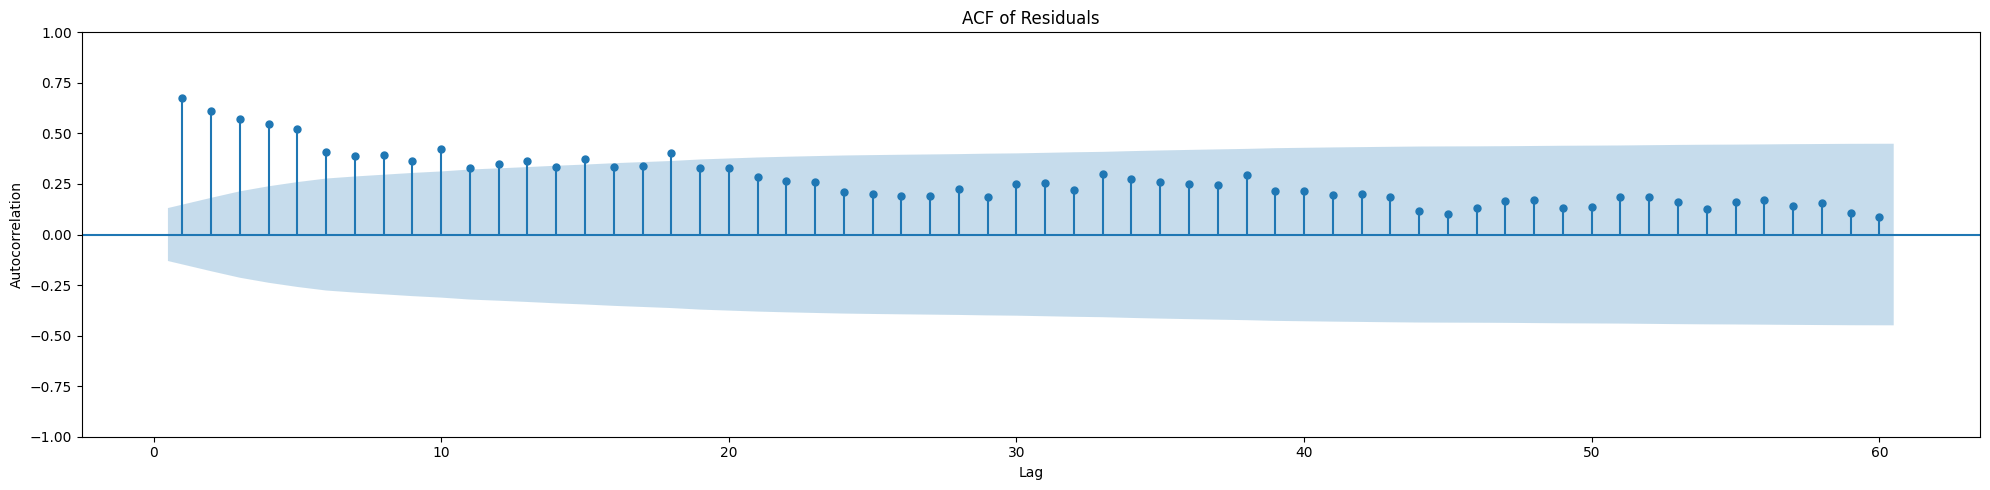

In [67]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_xgb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

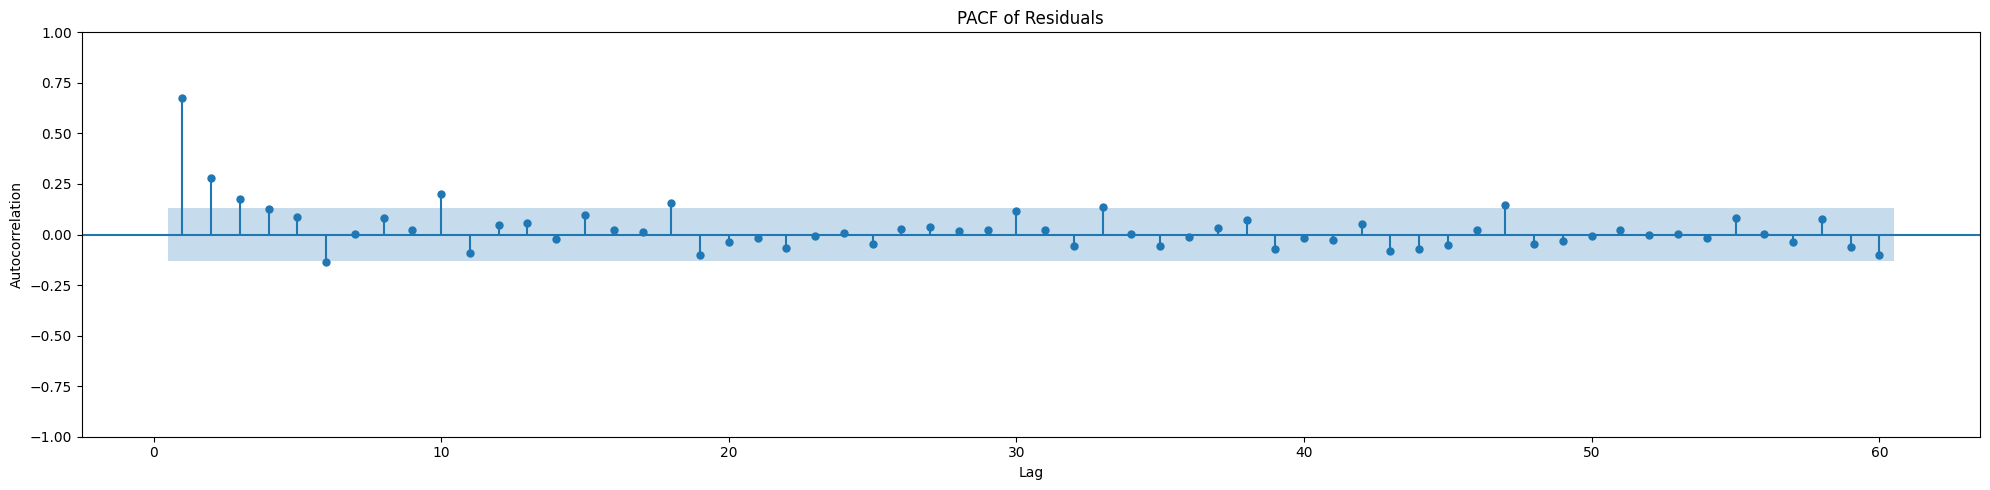

In [80]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_pacf(resid_xgb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

In [73]:
lb_xgb = acorr_ljungbox(resid_xgb, lags=[10], return_df=True)
print(lb_xgb)

       lb_stat      lb_pvalue
10  579.960958  3.454245e-118


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [98]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_xgb, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(49.231478785038746)}

## LightGBM Regressor

**Train & Test** 

In [45]:
lgb_param={'n_estimators':[100,300,500],'learning_rate':[0.01,0.05,0.1],'subsample':[0.8,0.9,1],'num_leaves':[31,62,200],'min_data_in_leaf': [10, 20, 50],'min_gain_to_split': [0.0, 0.01, 0.1] }
grid=GridSearchCV(estimator=LGBMRegressor(),param_grid=lgb_param,refit=True,scoring='neg_mean_squared_error',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_lgb=grid.predict(X_test)
print(f'mae:{mean_absolute_error(y_test,y_lgb)},rmse:{mean_squared_error(y_test,y_lgb)**0.5}')
print(f'%mae:{mean_absolute_error(y_test,y_lgb)*100/y_test.mean()} %')

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6704
[LightGBM] [Info] Number of data points in the train set: 894, number of used features: 29
[LightGBM] [Info] Start training from score 1839.196845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

**Plot Result**

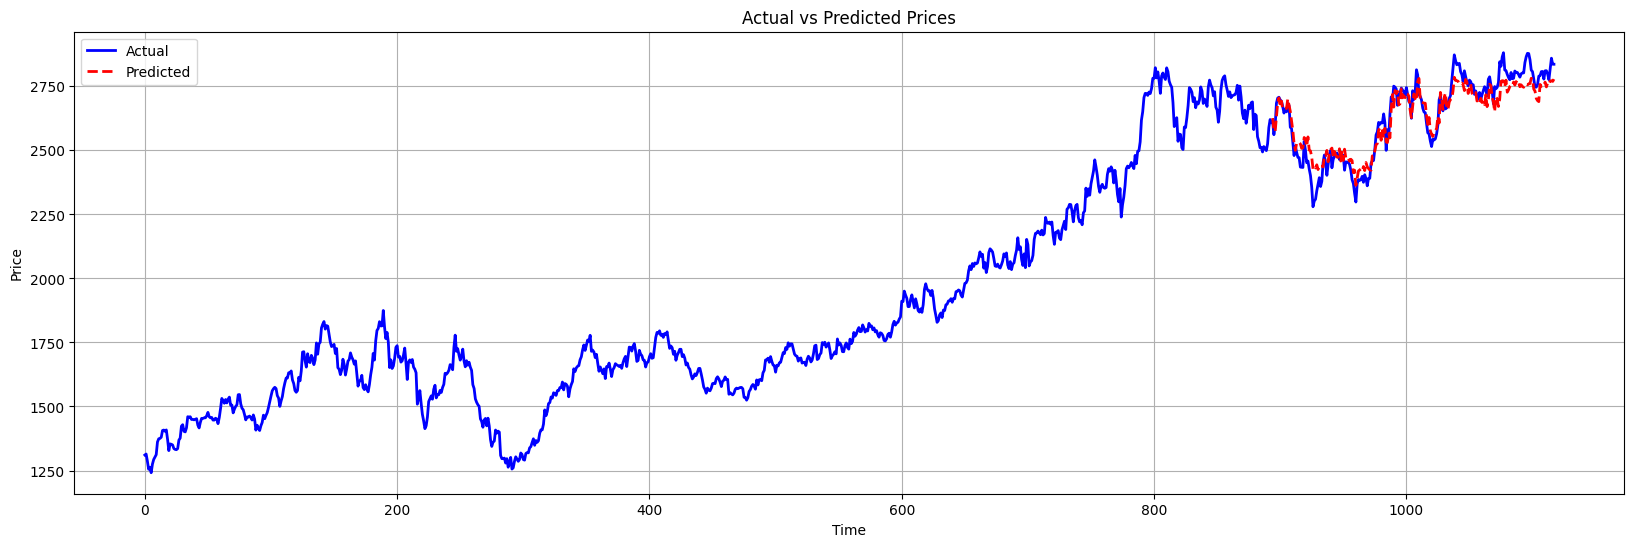

In [46]:
y_actual = np.concatenate([y_train, y_test], axis=0)
time_index = range(len(y_actual))
plt.figure(figsize=(20, 6))
plt.plot(time_index, y_actual, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_lgb, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Normality Of Residuals Check** 

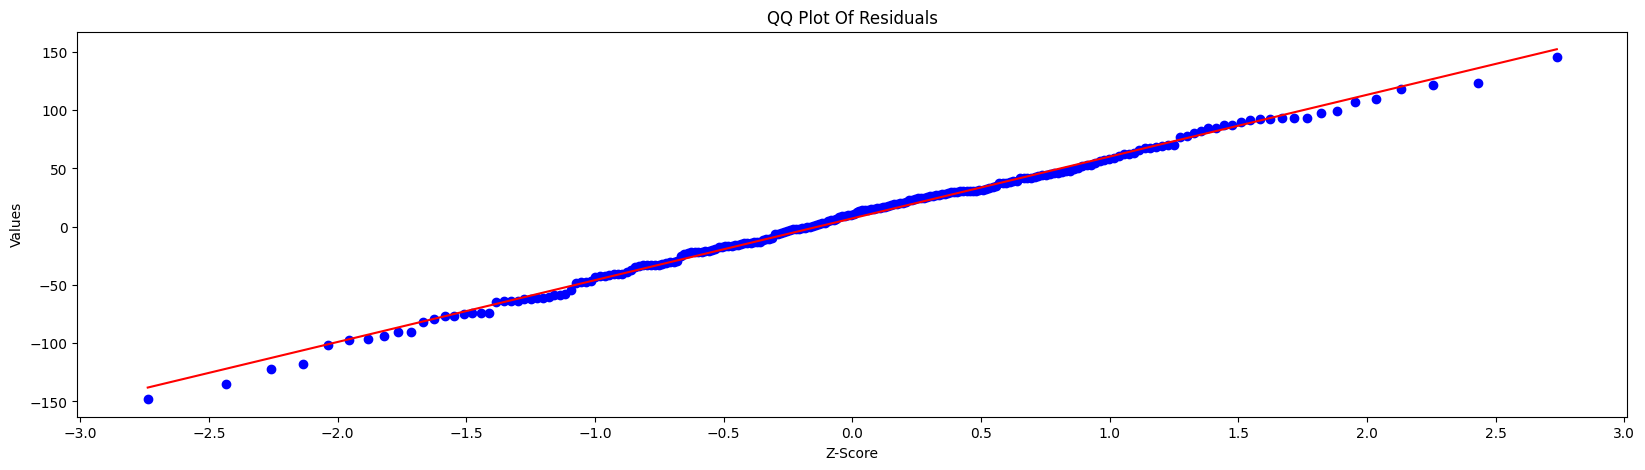

In [47]:
resid_lgb=y_test-y_lgb
plt.figure(figsize=(20,5))
st.probplot(resid_lgb,plot=plt)
plt.title('QQ Plot Of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Values')
plt.xticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
plt.show()

**Feature Linearity Check**

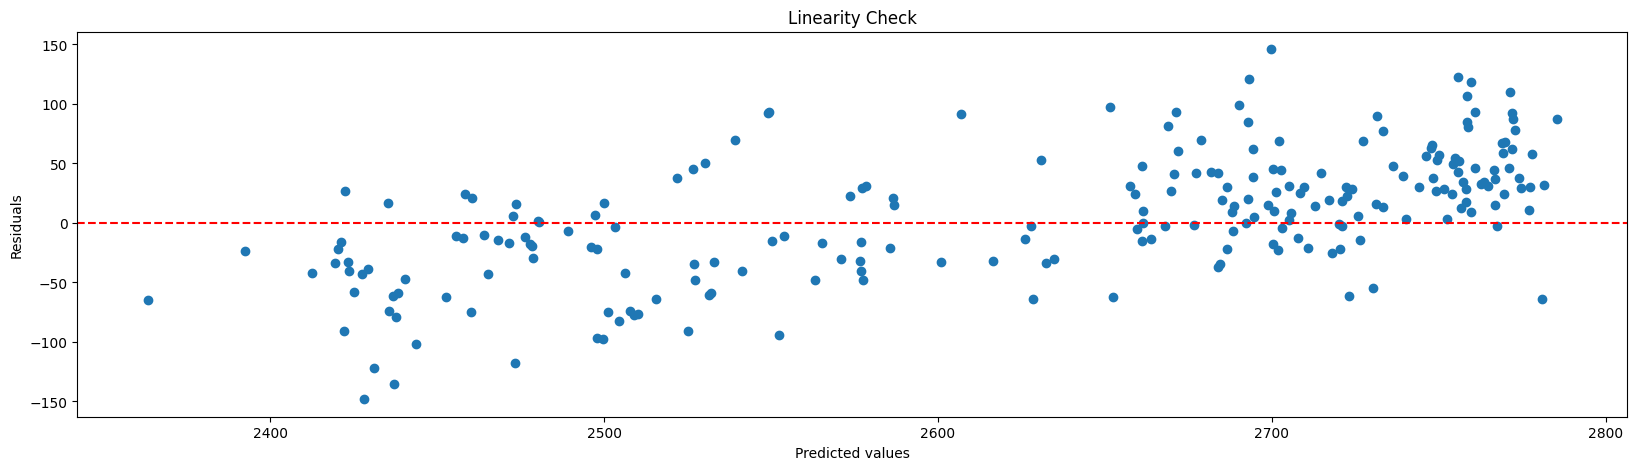

In [48]:
plt.figure(figsize=(20,5))
plt.scatter(y_lgb, resid_lgb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

**Autocorrelation Check (ACF/PACF/ Ljung-Box Test)**

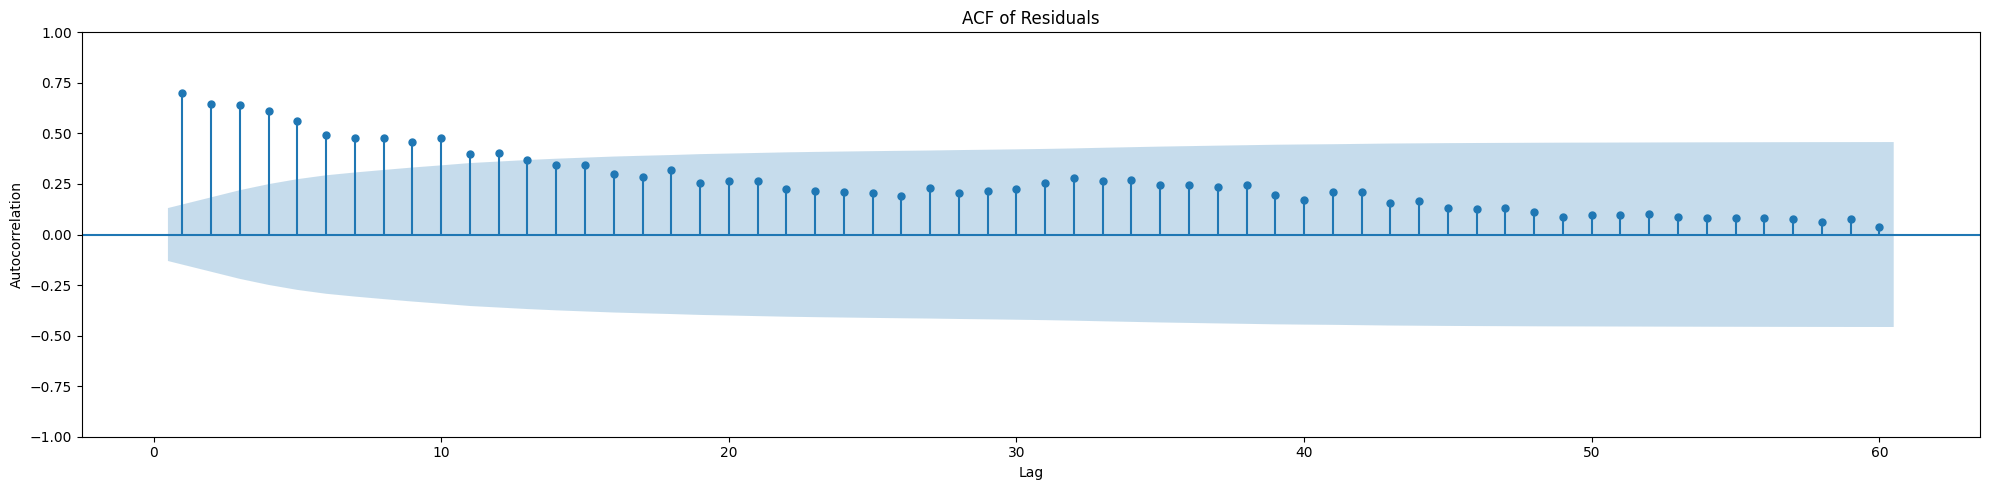

In [68]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_acf(resid_lgb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("ACF of Residuals")
plt.tight_layout()
plt.show()

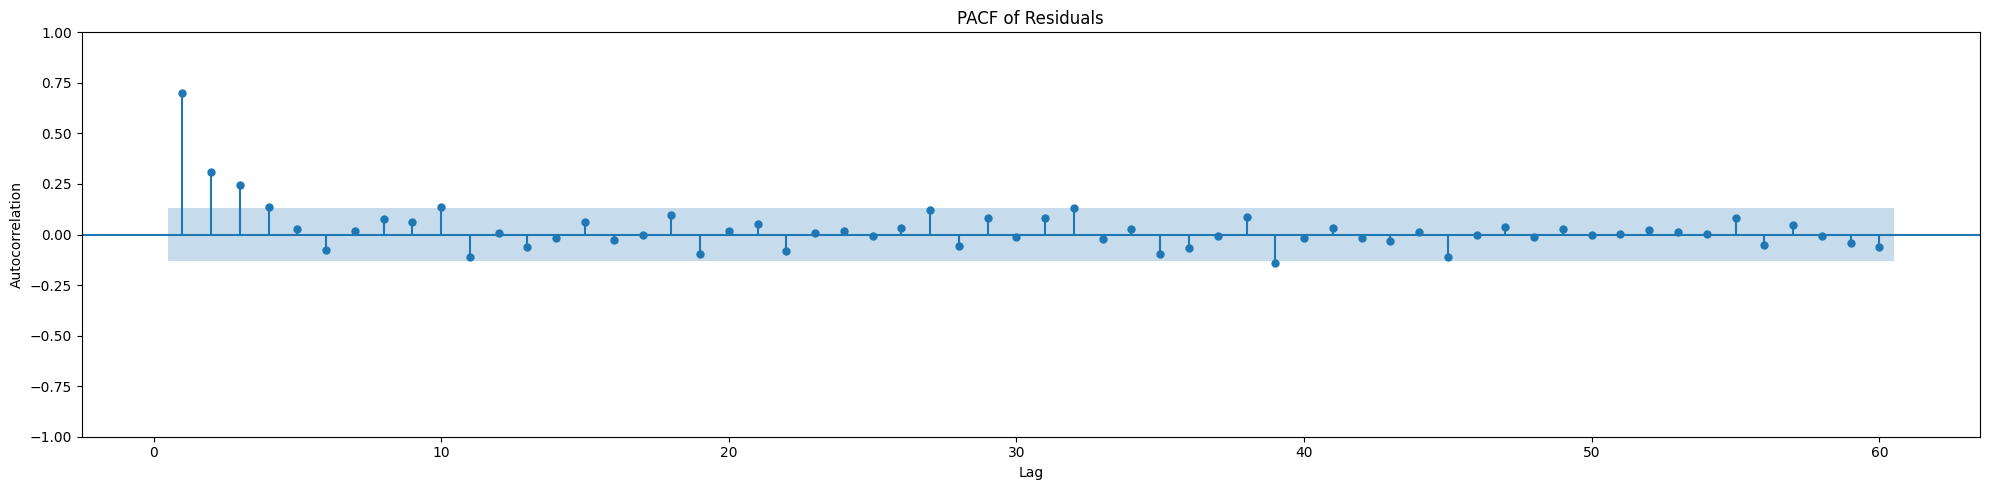

In [81]:
fig, ax = plt.subplots(figsize=(20,5)) 
plot_pacf(resid_lgb, lags=60,zero=False, ax=ax)      # lag= N/4 to N/5
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

In [74]:
lb_lgb = acorr_ljungbox(resid_lgb, lags=[10], return_df=True)
print(lb_lgb)

       lb_stat      lb_pvalue
10  725.474705  2.128774e-149


**Heteroskedasticity Check (Breusch-Pagan Test)**

In [99]:
X_const = sm.add_constant(X_test) 
bp_test = het_breuschpagan(resid_lgb, X_const)
labels = ['p-value']
dict(zip(labels, bp_test))

{'p-value': np.float64(35.56843754525968)}